# 3.1.1 Programming Questions

---




---



### 1. Write a small paragraph describing the Iris dataset.
  
  The Iris dataset is a well known and widely used beginner level dataset for Machine Learning purposes. It consists of 150 instances of Iris flowers, often used for classification tasks which is collected by Edgar Anderson and popularized by Ronald Fisher in 1936. The dataset contains four features such as Sepal length, Sepal width, Petal length, Petal width of three different set of Iris flowers (Setosa, Versicolor, and Virginica).


---


### 2. Identify the features/ attributes in Iris dataset?

  The Iris dataset contains four features such as:
  

*   Sepal Length
*   Sepal Width
*   Petal Length
*   Petal Width



---

### 3. Identify the total number of classes in Iris dataset?

  The dataset contains three classes of Iris flowers:


* Iris Setosa
* Iris Veriscolor
* Iris Virginica



---



### 4. In a table, summarize the total data instances of each class (Remember table and figure should have self contained appropriate captions.)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Loading the Iris dataset

iris = datasets.load_iris()

# Getting the labels data, which is stored in target

labels = iris.target

# Unique occurrences of each class

classes, counts = np.unique(labels, return_counts=True)

# Creating a dataframe

df = pd.DataFrame({ "Different Iris Classes": iris.target_names, "No of Instances of each": counts })

# Display table
print(df.to_markdown())

|    | Different Iris Classes   |   No of Instances of each |
|---:|:-------------------------|--------------------------:|
|  0 | setosa                   |                        50 |
|  1 | versicolor               |                        50 |
|  2 | virginica                |                        50 |


*Tabel 1: Distribution of instances for each class in the Iris dataset*



---


### 5. Split the Iris dataset randomly into training (80%) and testing (20%) (you can use sklearn train-test split - randomseed= 42)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Loading the iris dataset

iris = datasets.load_iris()

# Features

features = iris.data

# Labels

labels = iris.target

# Splitting the data into test and train data with 20% split and random state 42

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets

print(f"Training Data Size: {features_train.shape[0]}")
print(f"Testing Data Size: {features_test.shape[0]}")

Training Data Size: 120
Testing Data Size: 30




---


### 6. In a table, provide the number of data instances used for training and testing for each class.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()

features = iris.data
labels = iris.target

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

classes_train, counts_train = np.unique(labels_train, return_counts=True)

classes_test, counts_test = np.unique(labels_test, return_counts=True)

df = pd.DataFrame({
    "Class (Species)": iris.target_names,
    "Training Instances": counts_train,
    "Testing Instances": counts_test
})

print(df.to_markdown())

|    | Class (Species)   |   Training Instances |   Testing Instances |
|---:|:------------------|---------------------:|--------------------:|
|  0 | setosa            |                   40 |                  10 |
|  1 | versicolor        |                   41 |                   9 |
|  2 | virginica         |                   39 |                  11 |




---


### 7. Using the train data (obtained after splitting the total data into training and testing), perform three fold crossvalidation to find the best value of k in k Nearest Neighbour classifier (the k value can range from 1 to 25, and use euclidean norm to compute the distance). (You can use the k-fold crossvalidation package provided in sklearn for hyperparameter tuning - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier


iris = datasets.load_iris()

features = iris.data
labels = iris.target

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Splitting the training data into 3 folds for cross validation

features_train_folds = KFold(n_splits=3, shuffle=True, random_state=42)

k_param_range = range(1, 26)
accuracy_scores = []

# Performing cross-validation for each k value

for k in k_param_range:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  scores = cross_val_score(knn, features_train, labels_train, cv=features_train_folds, scoring='accuracy')
  accuracy_scores.append(scores.mean())

# Finding best k with highest accuracy

k_best = k_param_range[np.argmax(accuracy_scores)]
best_score = max(accuracy_scores)

# Creating a DataFrame to display results

df = pd.DataFrame({"k": k_param_range, "Mean Accuracy": accuracy_scores})

print(df.to_markdown(index=False))
print('--------------------------------')
print(f"Best k: {k_best} with Accuracy: {best_score}")

|   k |   Mean Accuracy |
|----:|----------------:|
|   1 |        0.941667 |
|   2 |        0.933333 |
|   3 |        0.95     |
|   4 |        0.933333 |
|   5 |        0.95     |
|   6 |        0.95     |
|   7 |        0.958333 |
|   8 |        0.975    |
|   9 |        0.958333 |
|  10 |        0.983333 |
|  11 |        0.975    |
|  12 |        0.975    |
|  13 |        0.966667 |
|  14 |        0.966667 |
|  15 |        0.966667 |
|  16 |        0.95     |
|  17 |        0.95     |
|  18 |        0.958333 |
|  19 |        0.95     |
|  20 |        0.95     |
|  21 |        0.95     |
|  22 |        0.958333 |
|  23 |        0.933333 |
|  24 |        0.925    |
|  25 |        0.933333 |
--------------------------------
Best k: 10 with Accuracy: 0.9833333333333334




---



### 8. Plot the average macro f1-score obtained using three fold crossvalidation with respect to the different values of k considered in three fold crossvalidation.

Best K 10
Best F1 score 0.9839126901195866


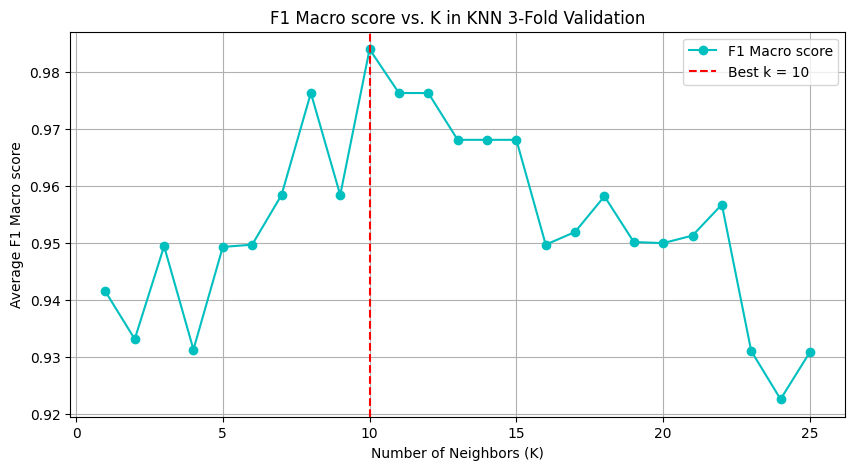

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


iris = datasets.load_iris()

features = iris.data
labels = iris.target

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

features_train_folds = KFold(n_splits=3, shuffle=True, random_state=42)

k_param_range = range(1, 26)
f1_macro_scores = []

for k in k_param_range:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  scores = cross_val_score(knn, features_train,labels_train,cv=features_train_folds, scoring='f1_macro')
  f1_macro_scores.append(scores.mean())

# Best K

best_k = k_param_range[np.argmax(f1_macro_scores)]
best_f1_score = max(f1_macro_scores)

print("Best K", best_k)
print("Best F1 score", best_f1_score)


# Plotting K vs Average f1 macro score

plt.figure(figsize=(10, 5))
plt.plot(k_param_range, f1_macro_scores, marker='o', linestyle='-', color='c', label="F1 Macro score")
plt.axvline(best_k, color='r', linestyle='--', label=f"Best k = {best_k}")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Average F1 Macro score")
plt.title("F1 Macro score vs. K in KNN 3-Fold Validation")
plt.legend()
plt.grid(True)
plt.show()




---


### 9. Identify the best value of k for which you get the peak performance in three fold crossvalidation.



From the above plot, the mean macro F1-score is maximum (0.98) when k is 10. This when k is 10 we can get the peak performance.




---


### 10. Using the best value of k, evaluate the performance of the k nearest neighbour classifier on the testdata (Remember testing should be done only once!).

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


iris = datasets.load_iris()

features = iris.data
labels = iris.target

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train KNN with the best k found (k=10)

best_knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
best_knn.fit(features_train, labels_train)


# Predict on test data

prediction = best_knn.predict(features_test)

# Evaluating performance
accuracy = accuracy_score(labels_test, prediction)
class_report = classification_report(labels_test, prediction, target_names=iris.target_names)

# Print evaluation results
print(f"Test Accuracy: {accuracy}")
print("\nClassification Report:\n", class_report)

Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30





---



### 11. Report the test accuracy, precision, recall, f1-score and macro f1-score.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


iris = datasets.load_iris()

features = iris.data
labels = iris.target

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train KNN with the best k found (k=10)

best_knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
best_knn.fit(features_train, labels_train)


# Predict on test data

prediction = best_knn.predict(features_test)

# Computing the evaluation metrics
test_accuracy = accuracy_score(labels_test, prediction)
precision = precision_score(labels_test, prediction, average='macro')
recall = recall_score(labels_test, prediction, average='macro')
f1_macro = f1_score(labels_test, prediction, average='macro')
f1_weighted = f1_score(labels_test, prediction, average='weighted')

# Print results
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision (Macro): {precision:}")
print(f"Recall (Macro): {recall}")
print(f"F1-Score (Macro): {f1_macro}")
print(f"F1-Score (Weighted): {f1_weighted}")

Test Accuracy: 1.0
Precision (Macro): 1.0
Recall (Macro): 1.0
F1-Score (Macro): 1.0
F1-Score (Weighted): 1.0


# 3.1.2 Vector Space

### 12. Define the following (Refer to chapter 3 of the book: Introduction to Linear Algebra (Fifth Edition) by Prof. Gilbert Strang)




###  Vector Space -


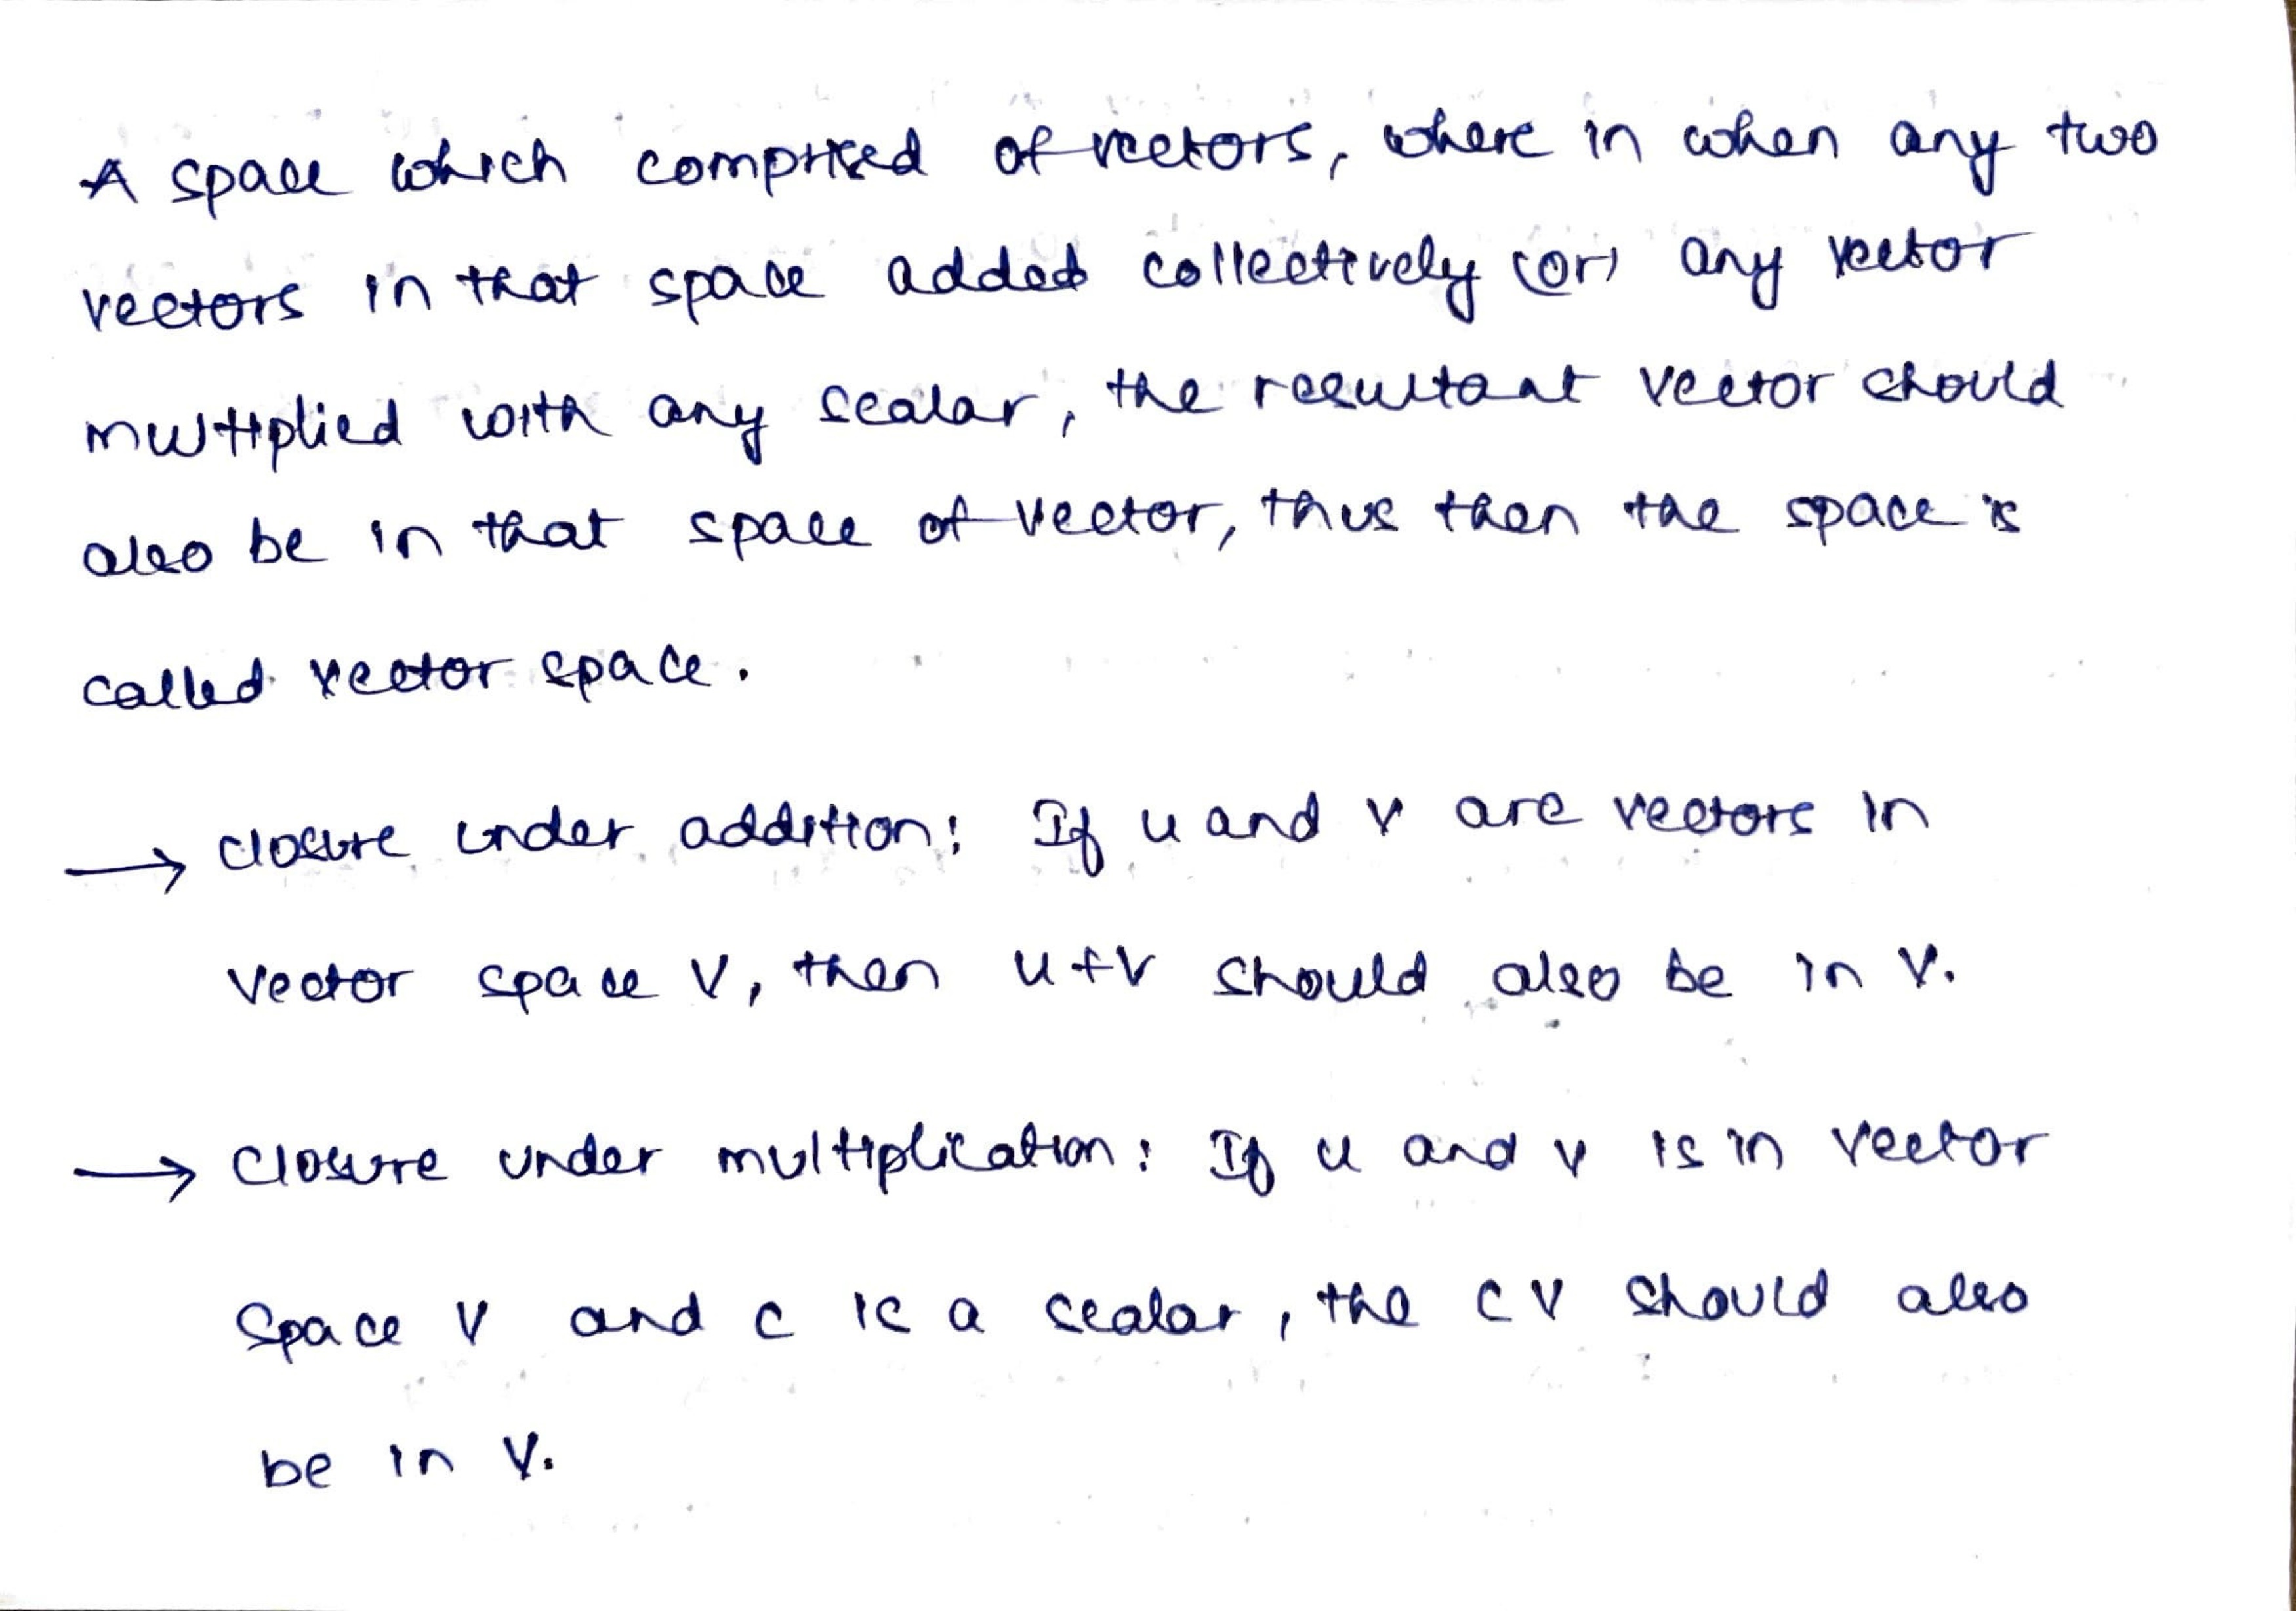



---


### Column Space of a Matrix A -

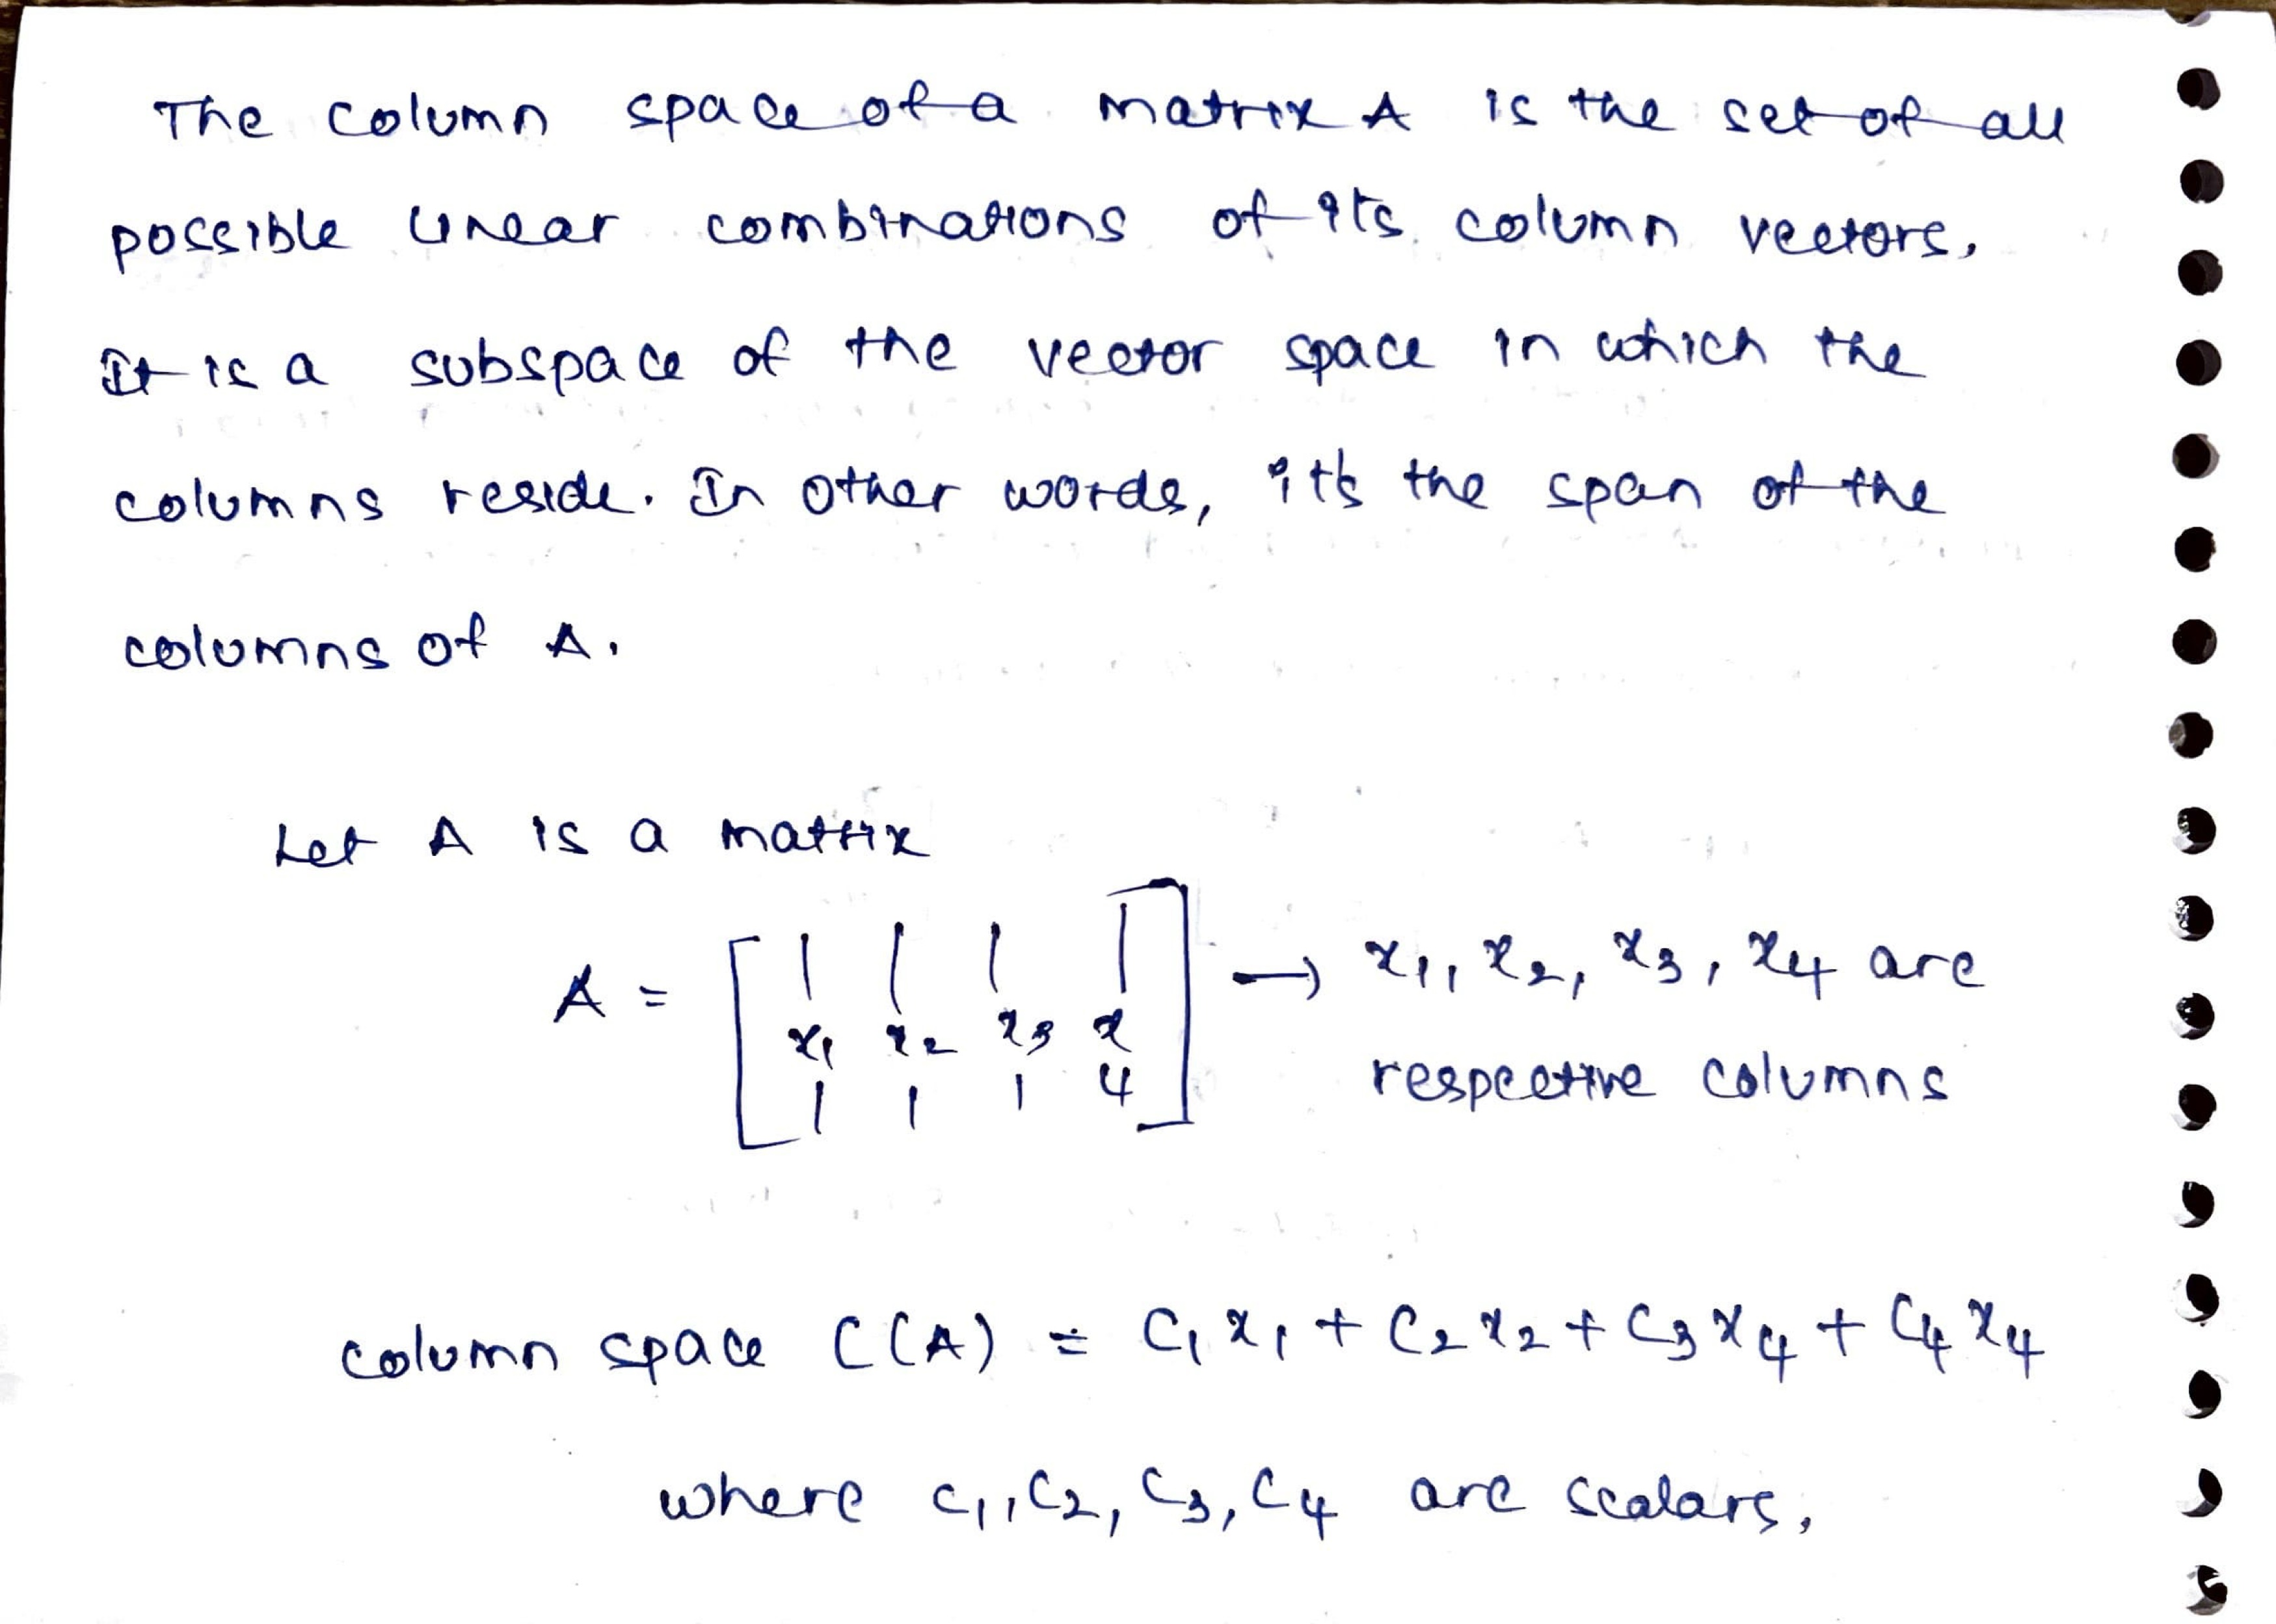



---





### Row Space of a Matrix A -

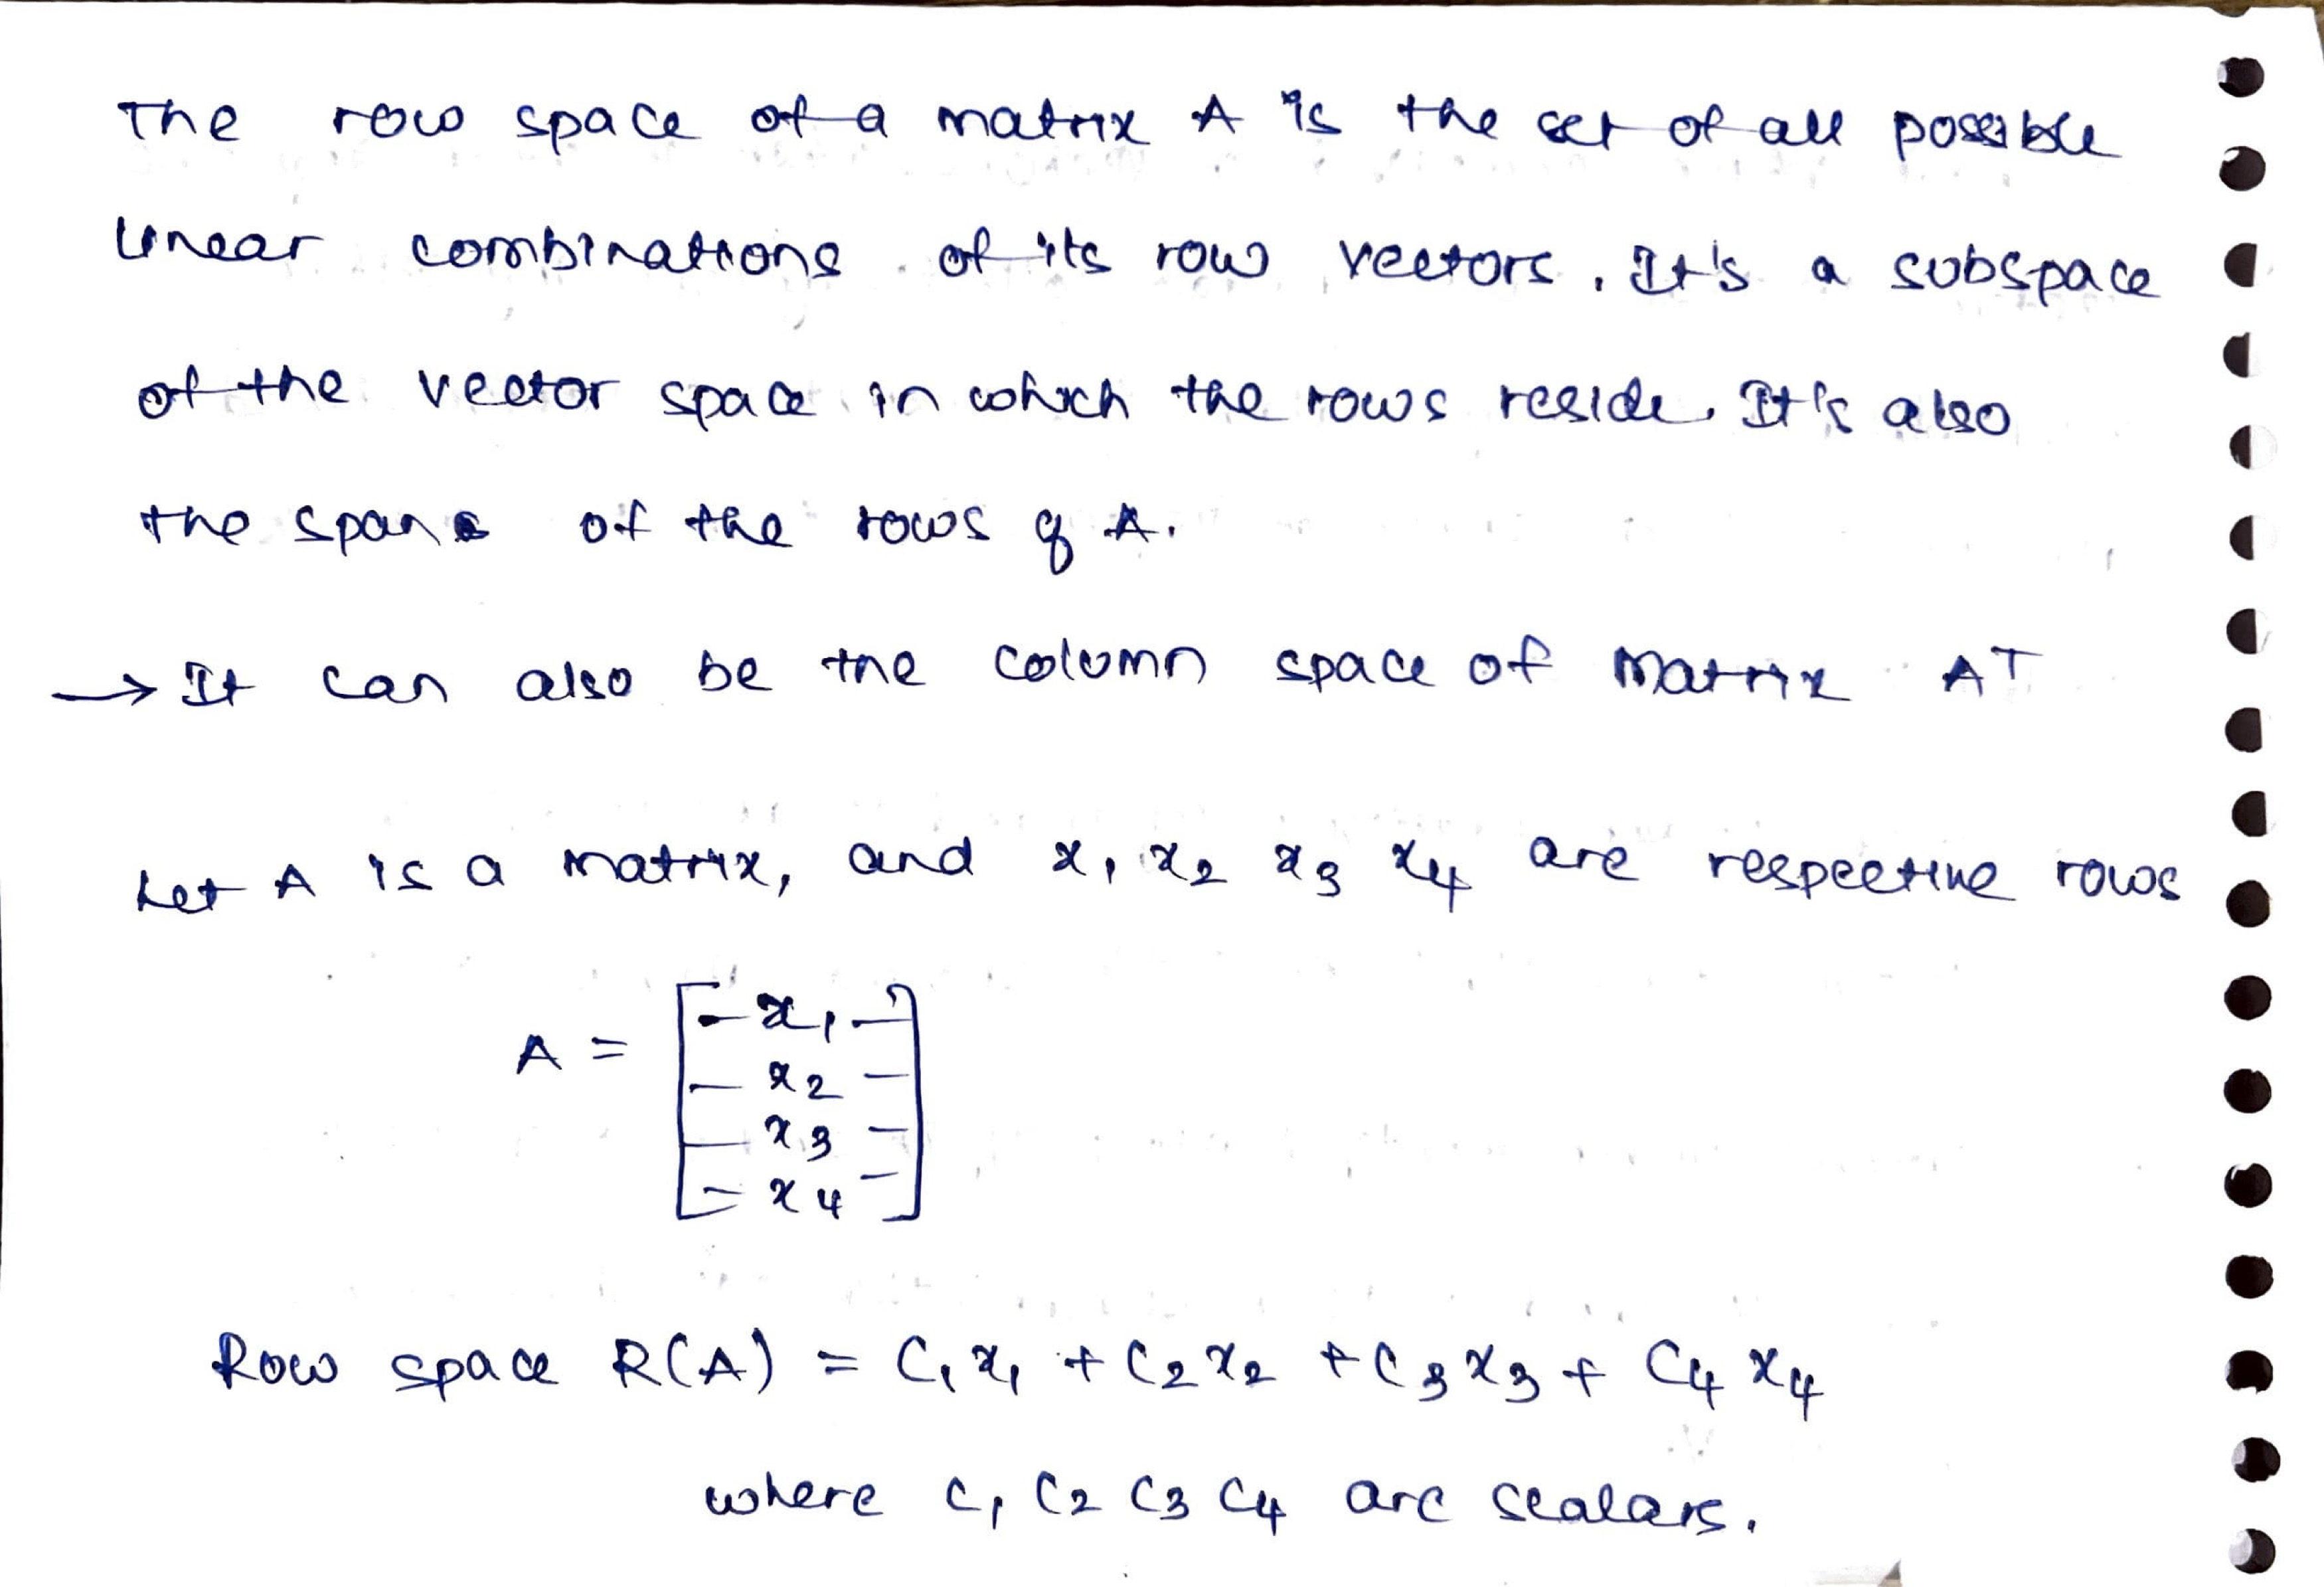



---

### Right Null Space of a Matrix A -


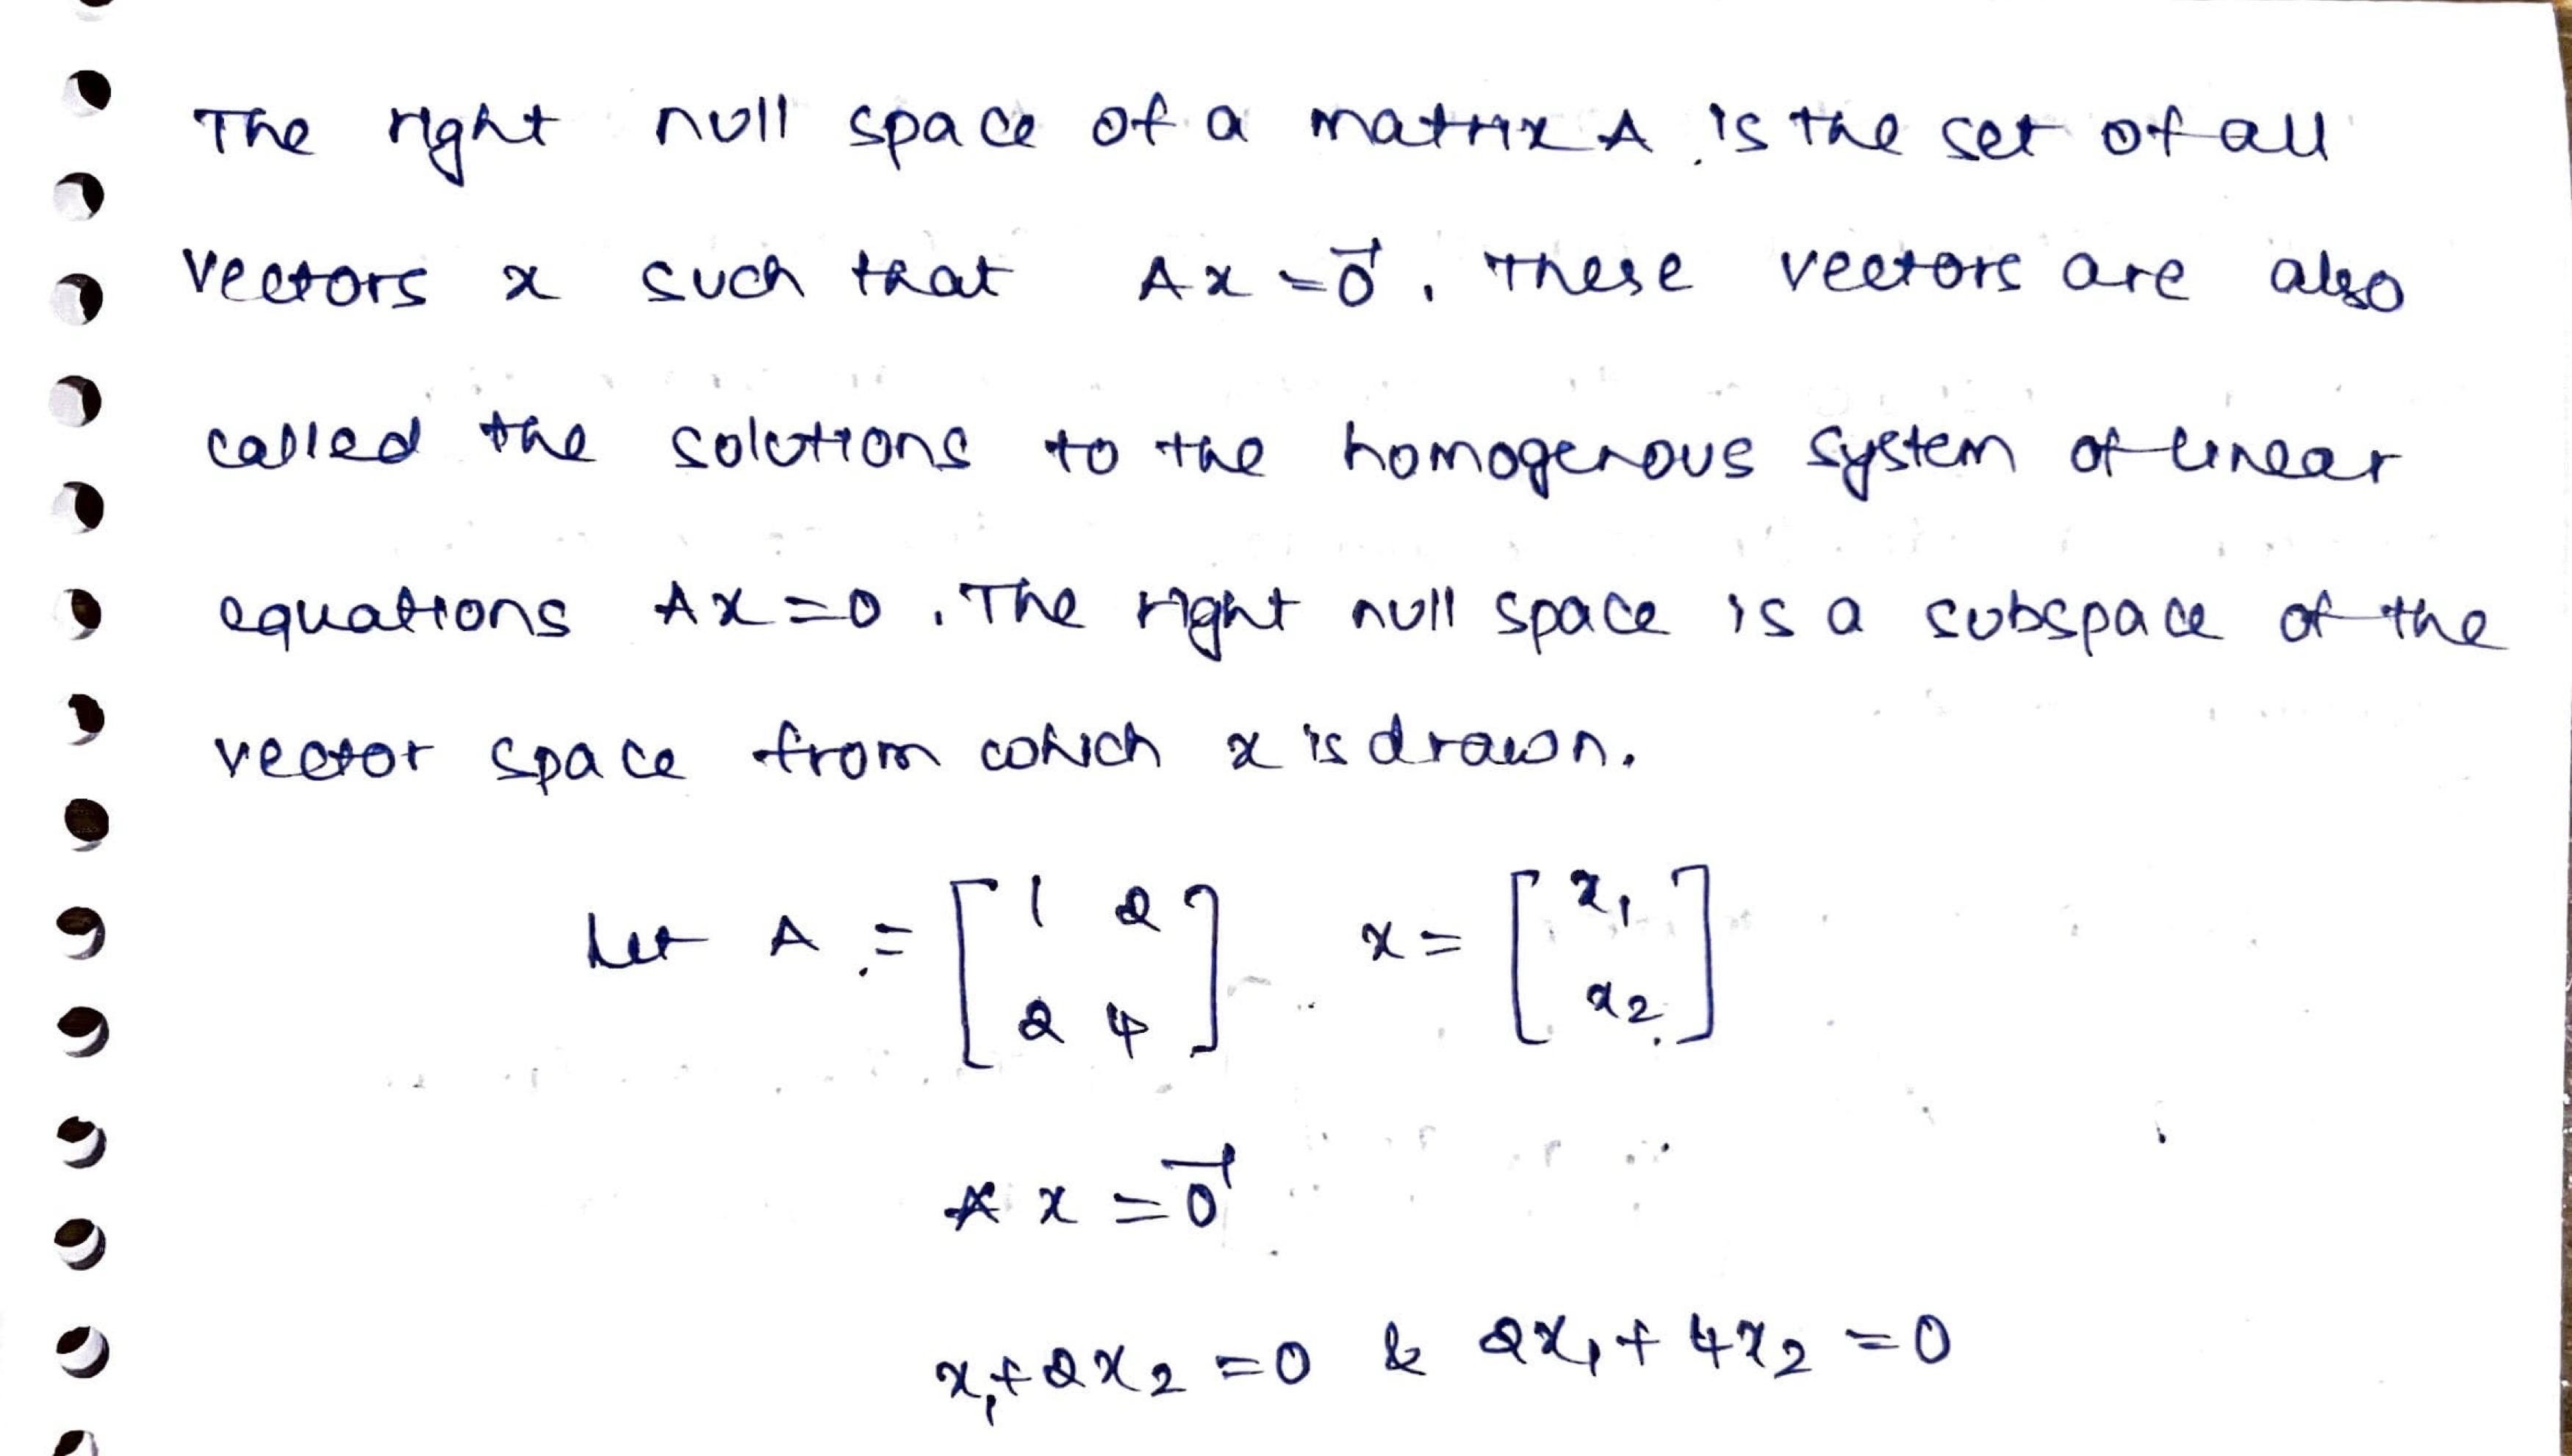

---





### Left Null Space of a Matrix A -

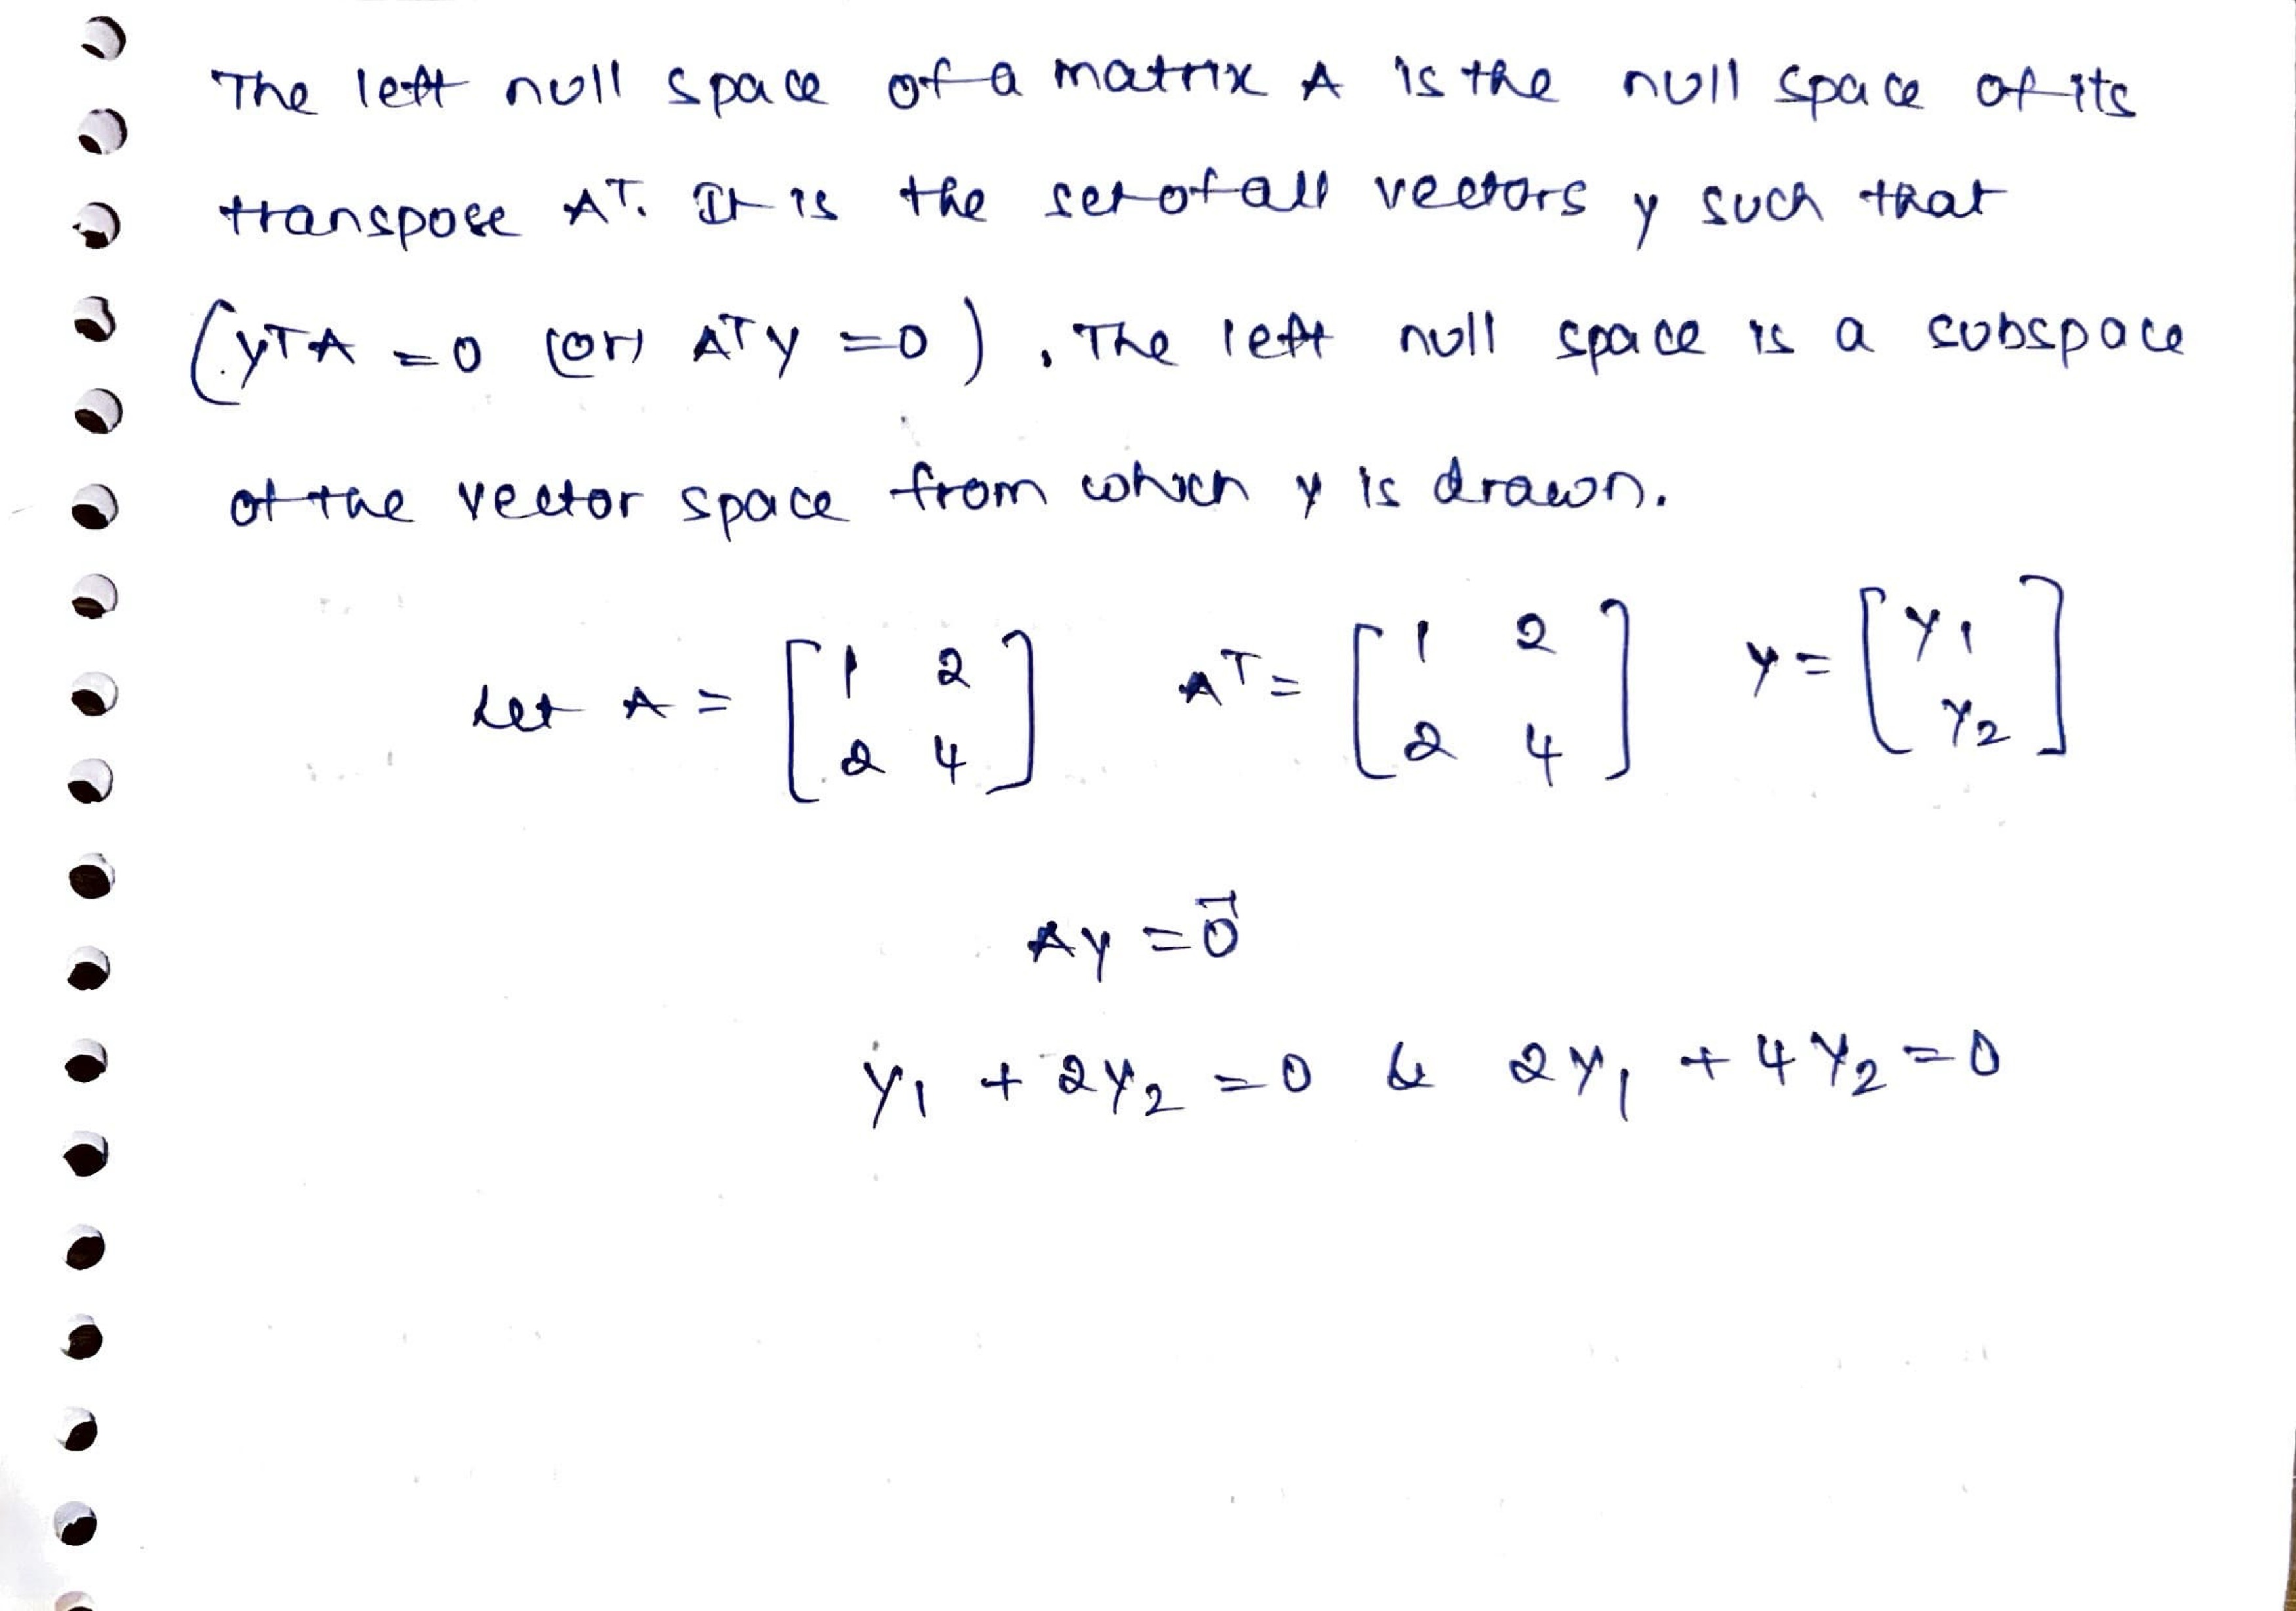


---



### Dimension of a Vector Space -

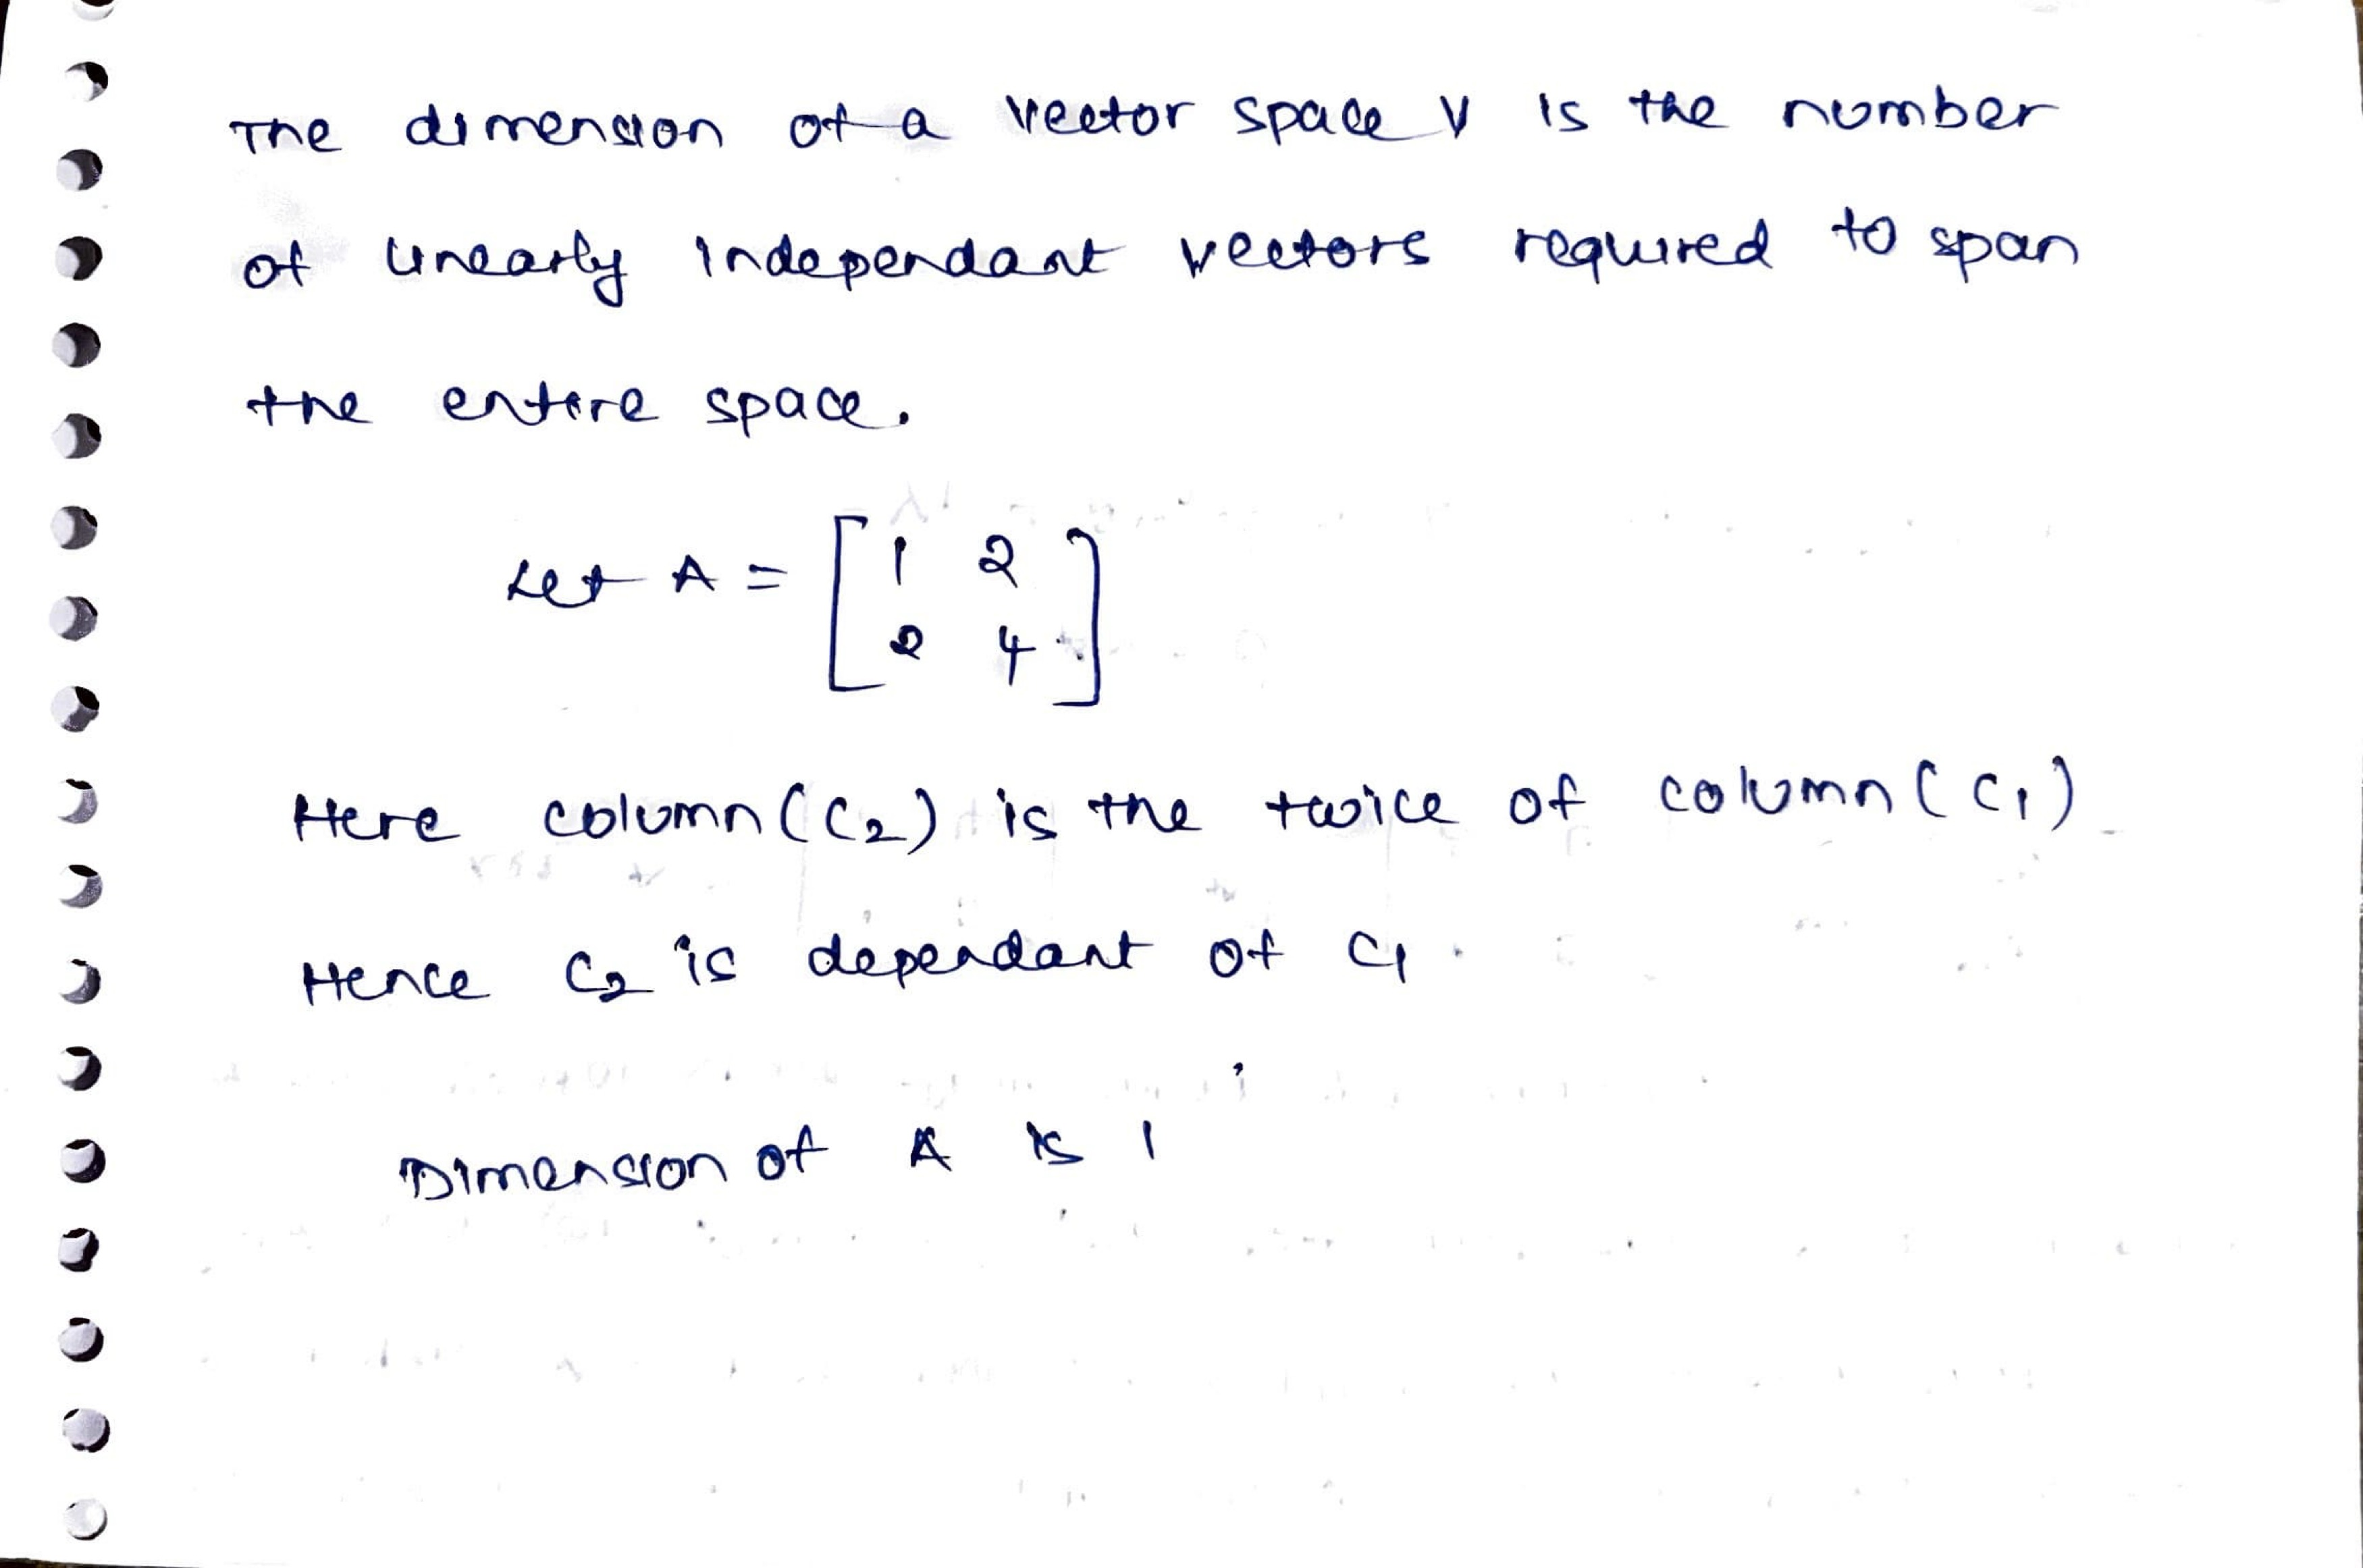

---



### Basis set of a Vector Space -

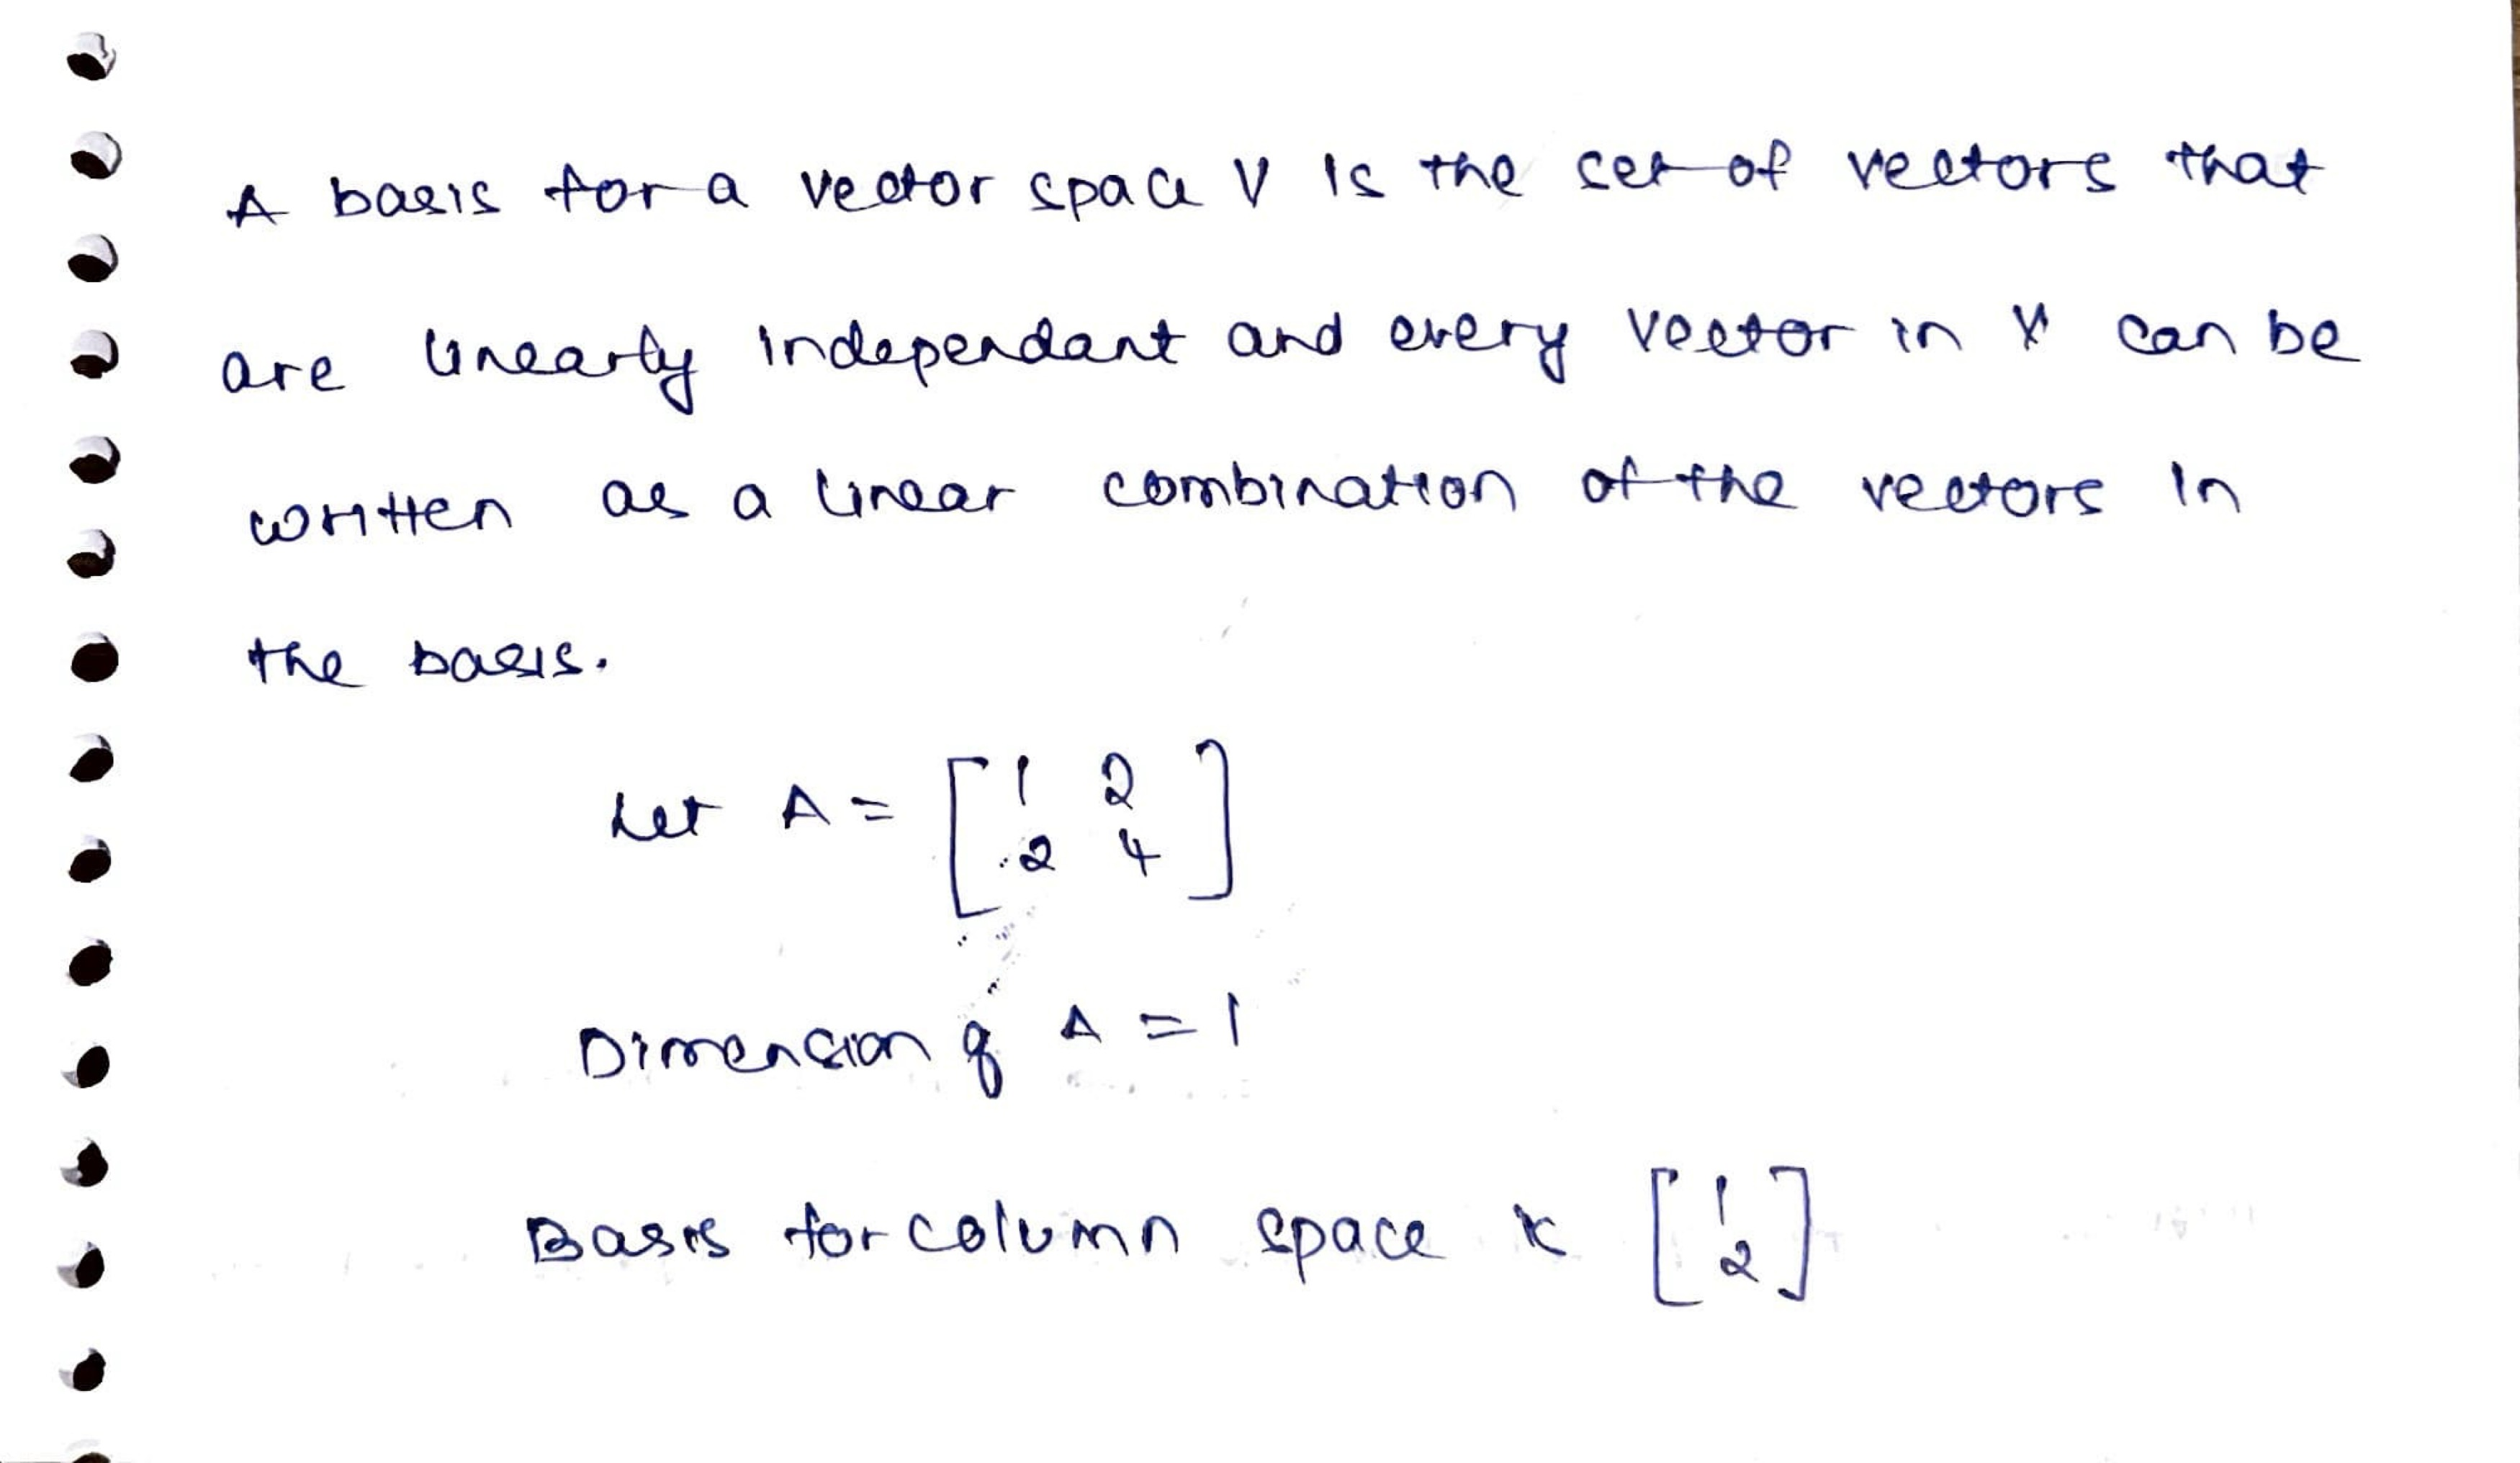

---



### Rank of a Matrix A -

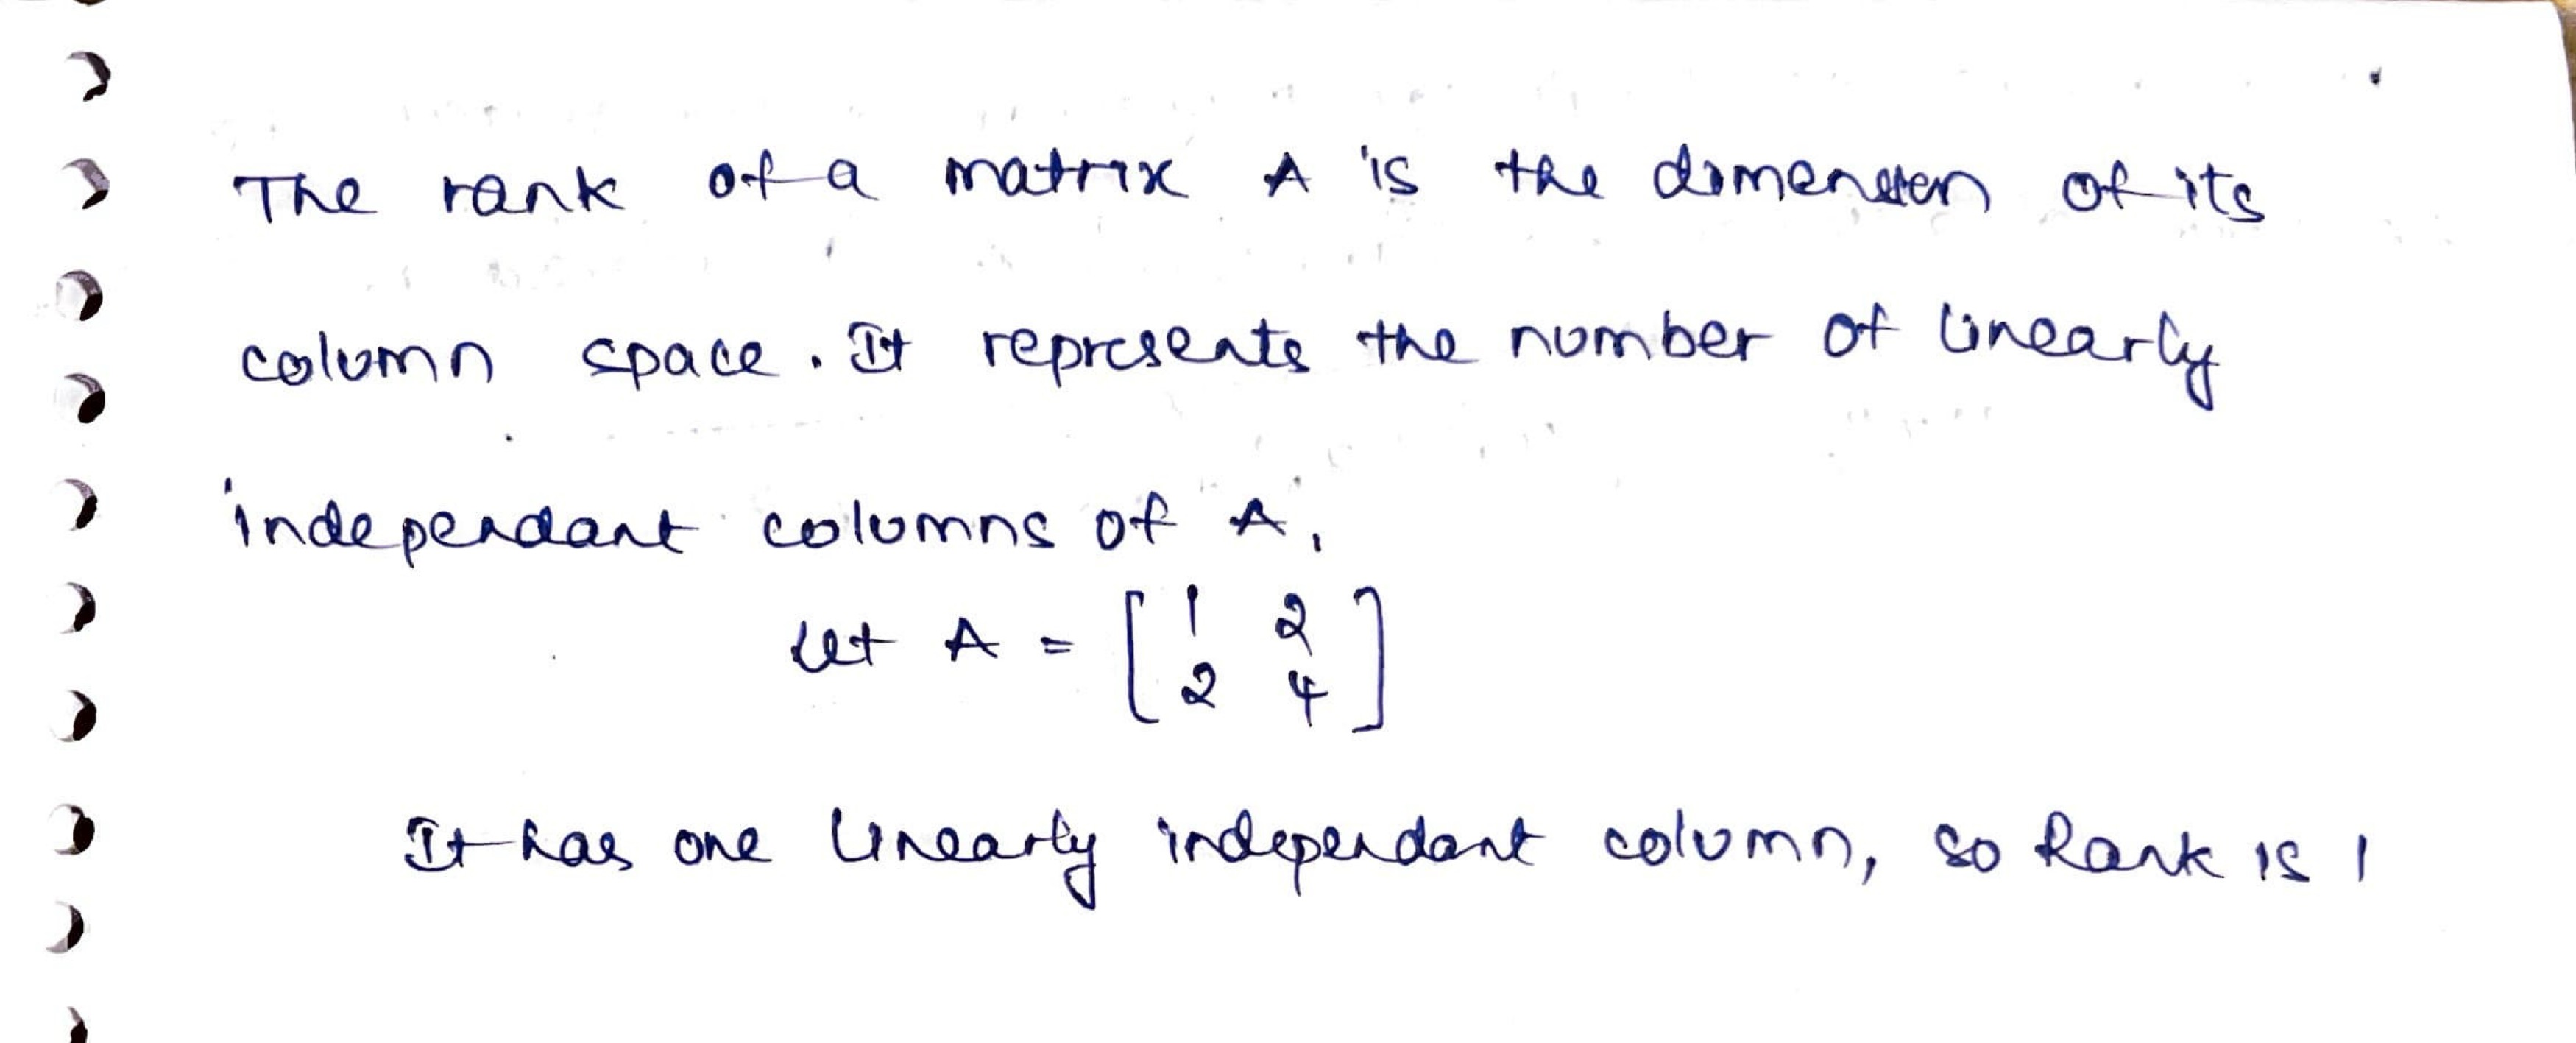

---



### L2 norm of a vector x -

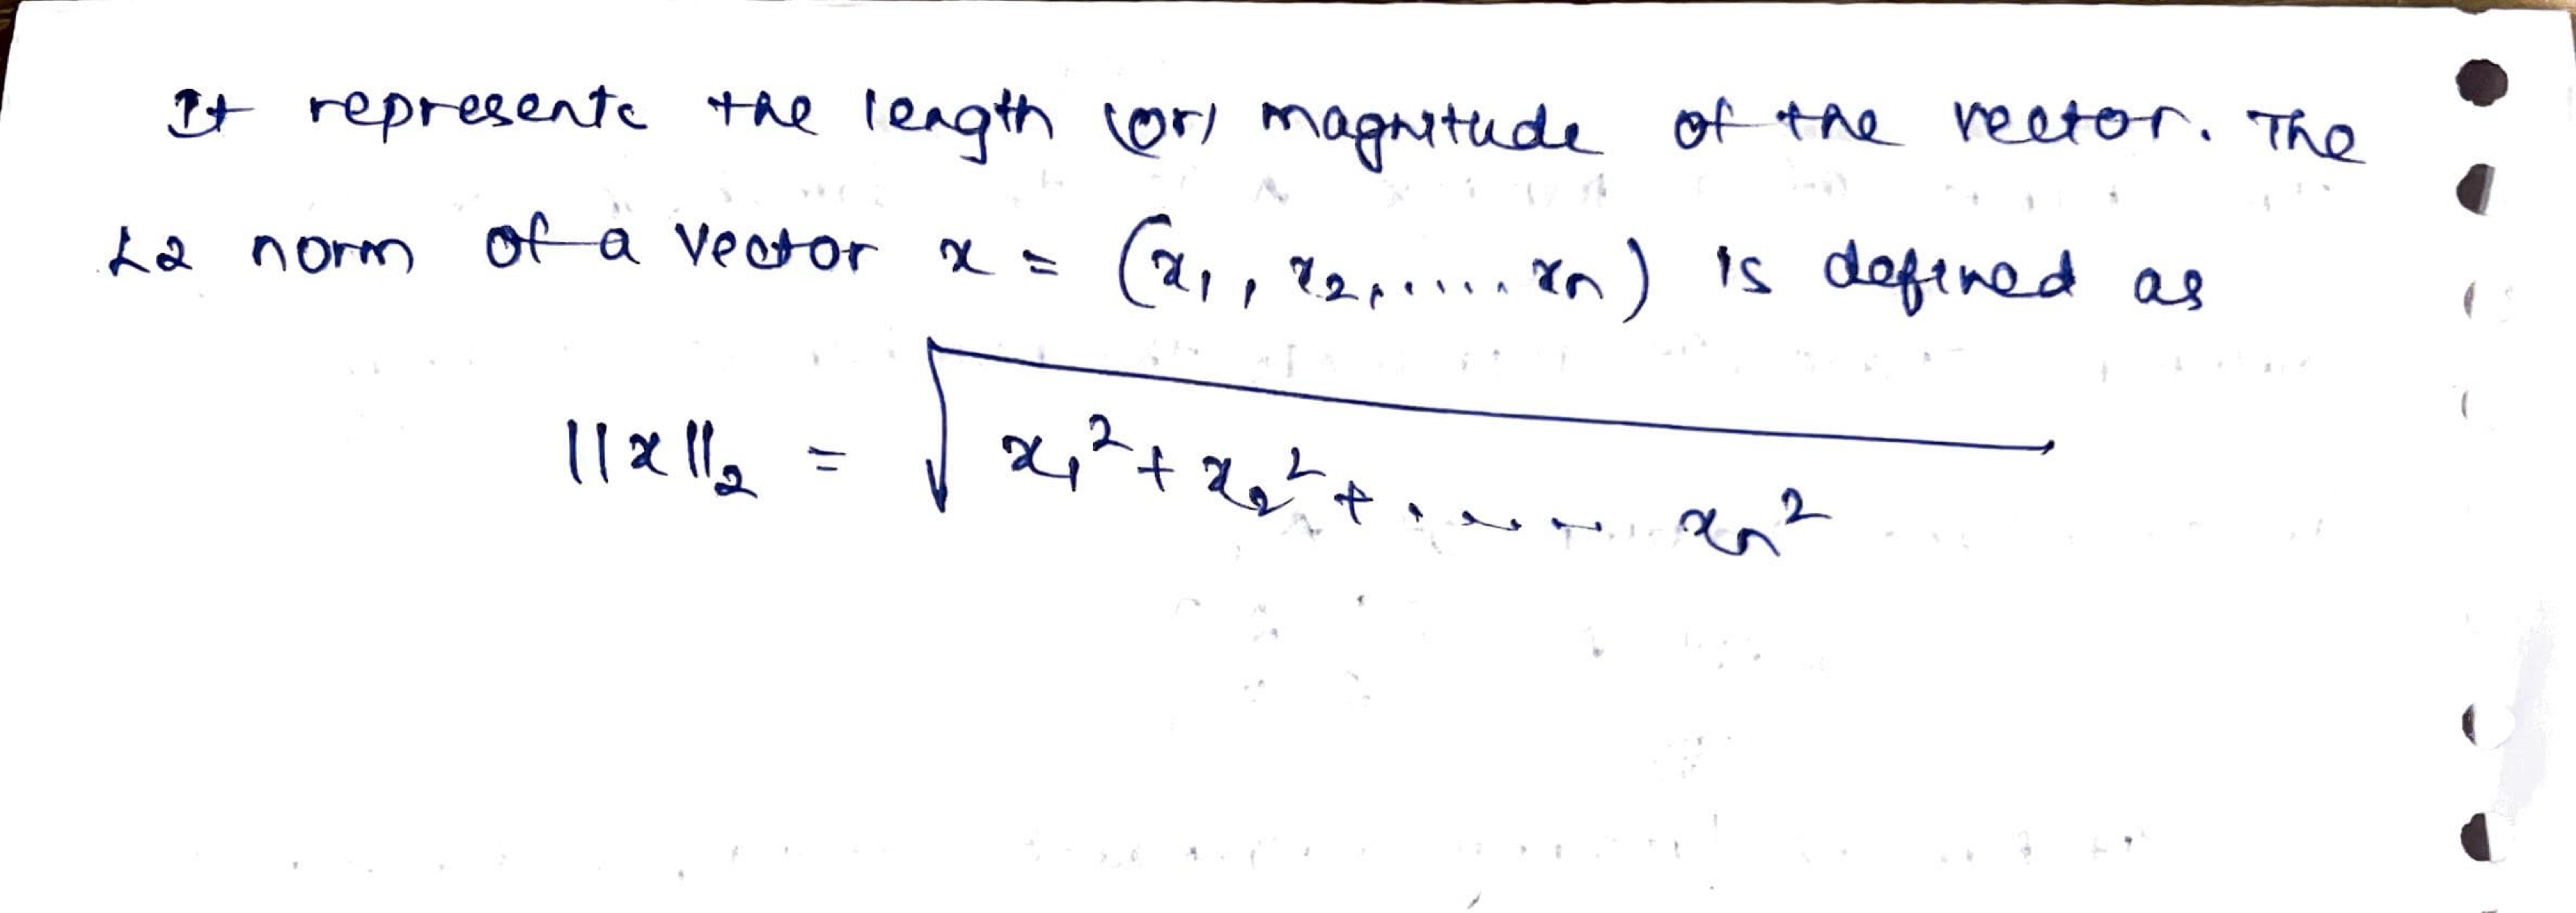

---



### 13. Ax = b has a solution when b lies in_____space of A


Answer - Column space



---



### 14. Two nonzero vectors are orthogonal when their____is_____ .

Answer - Two non zero vectors are Orthogonal when their Dot Product is Zero.



---



### 15. Two nonzero vectors are orthonormal when their dot product is______ and the L2 norm of two vectors are _____ respectively.

Answer - Two non zero vectors are Orthonormal, when their Dot Product is 0 and their L2 norm is 1.



---



### 16. Consider matrices A of size m×n and B = [A A] of size m×2n (repeated A twice). A and B has same ______ space and  ______ space.

Answer - A and B has same Row space and Left null space.



---



### 17. Are the following statements True or False? Justify or give examples to support your reasoning.




1.   Orthogonality of two nonzero vectors implies linear independence - **True**
2.   Linear independence of two vectors implies orthogonality - **False**
3.   Dimension of row space and column space of an m × n matrix A are same - **True**
4.   Row rank and Column rank of an m × n matrix A are same - **True**
5.   f two m × n matrices A and B have the same row space, column space, right null space and left null space, then A = B - **True**



---





### 18. For the given matrix A, find the basis set for column space and row space. Also geometrically depict the basis set that spans the column space



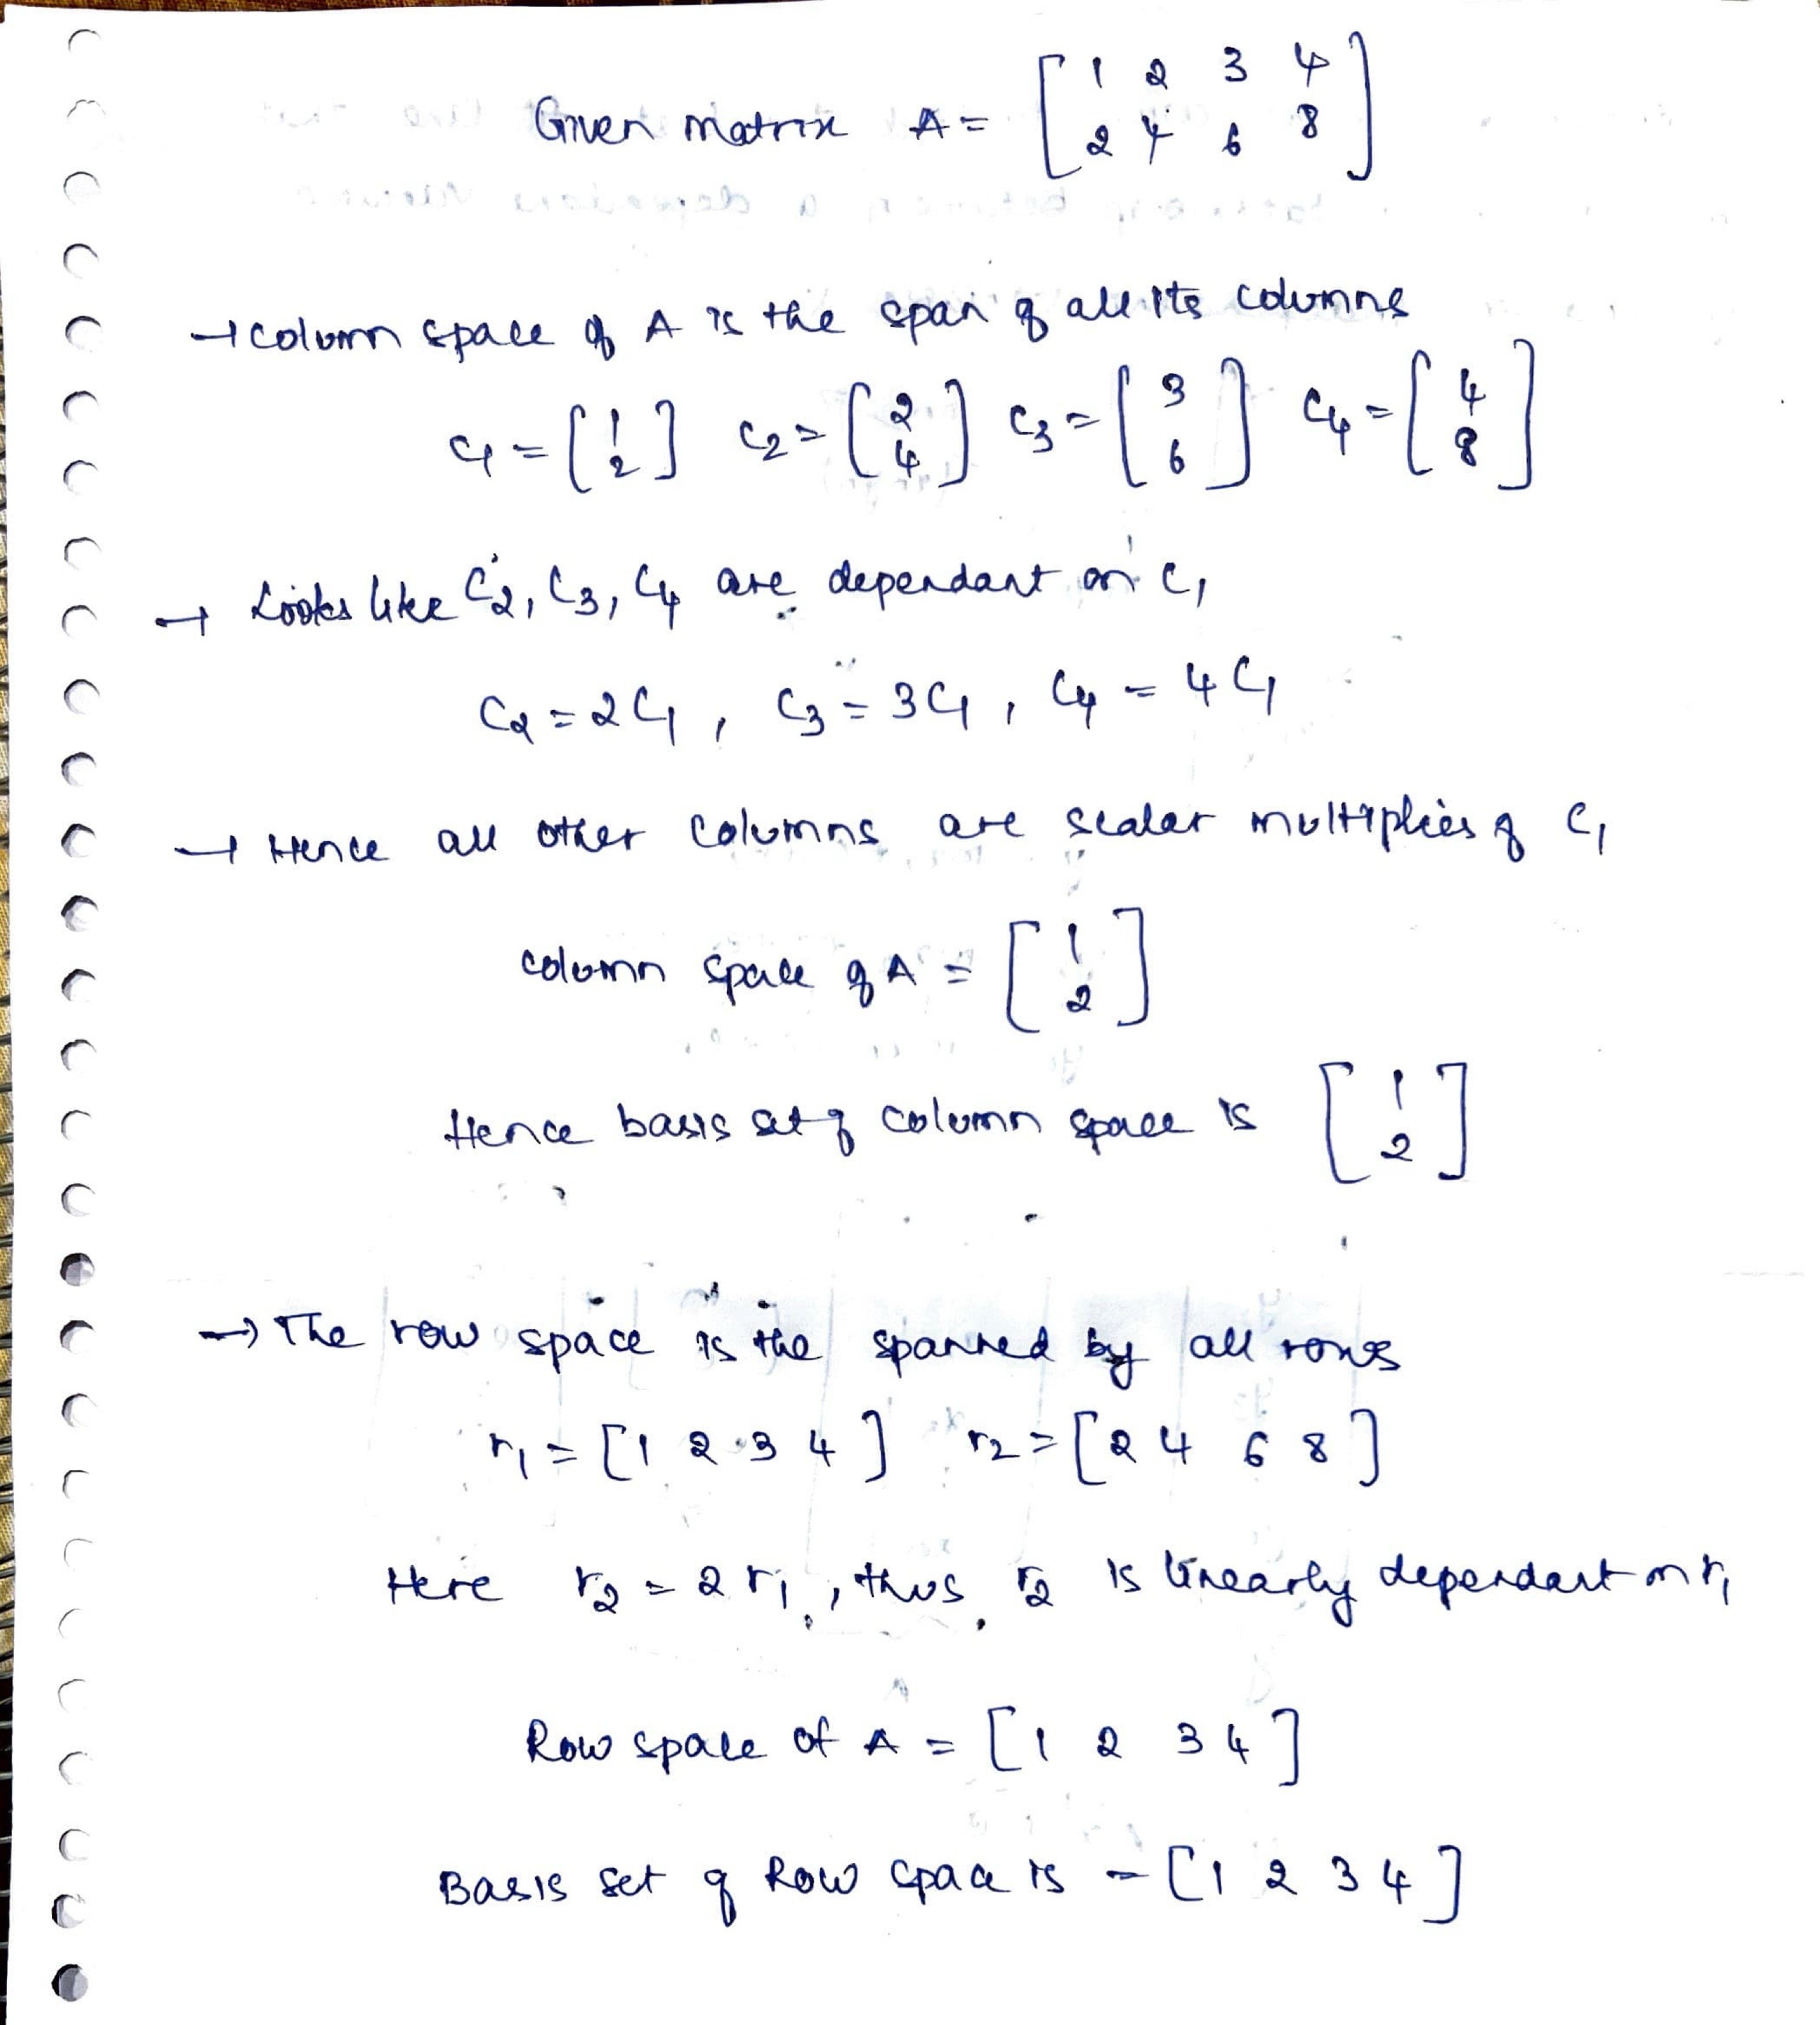



**Goemetric Interpretation:**


1.   The column space is a 1 dimensional subspace in R2, which implies all column vectors lie along the line defined by c1.
2.   The row space is a 1-dimensional subspace in R4, which implies all row vectors lie along the line defined by r1.



---



# 3.1.3 Programming Question

### 19. Create a random 5×4 matrix A with rank 2 and a 5×1 vector b such that Ax = b has infinite solution. Write the python code and also generate infinite solutions using loop.

In [ ]:
import numpy as np
from scipy.linalg import null_space


np.random.seed(42)

np.random.seed(42)

# Creatinng two independant vectors

v1 = np.random.randint(1, 10, size=5)
v2 = np.random.randint(1, 10, size=5)

A = np.column_stack((v1, v2, 2 * v1 - v2, v1 + 3 * v2))

print("Matrix A: \n")
print(A)

# Rank of matrix

rank_A = np.linalg.matrix_rank(A)
print(f"\nRank of A: {rank_A}")

# Creating a vector b in the column space of A

b = (4 * v1 + v2).reshape(5, 1)

print("\nMatrix b: \n")
print(b)

print("\n\n")

N = null_space(A)
x0 = np.linalg.pinv(A) @ b

num_solutions = 4
lambdas = np.random.randn(num_solutions, N.shape[1])

print("Infinite solutions: \n")
for i in range(num_solutions):
    x_inf = x0 + N @ lambdas[i].reshape(-1, 1)
    print(f"Solution {i+1}:\n{x_inf}\n")



Matrix A: 

[[ 7  3 11 16]
 [ 4  7  1 25]
 [ 8  8  8 32]
 [ 5  5  5 20]
 [ 7  4 10 19]]

Rank of A: 2

Matrix b: 

[[31]
 [23]
 [40]
 [25]
 [32]]



Infinite solutions: 

Solution 1:
[[ 0.89197862]
 [-0.89517215]
 [ 1.06127028]
 [ 0.98548081]]

Solution 2:
[[ 0.69209645]
 [-0.13555565]
 [ 1.25545071]
 [ 0.79700212]]

Solution 3:
[[ 0.88238411]
 [-0.30164916]
 [ 1.15017122]
 [ 0.81727346]]

Solution 4:
[[1.11158138]
 [0.25805939]
 [1.13190218]
 [0.62461426]]





---



### 20. Create a 3 × 4 matrix with rank 3, check whether right null space and left null space exist. Comment. Write a python code to verify

To create a 3×4 with rank 3, we need to ensure that the matrix has three linearly independent rows.

Since the rank of Matrix is 3 and the number of columns is 4, the right null space exists because the number of free variables is 4−3 = 1. This means there is a non-trivial solution to Ax=0.

Similarly, the left null space (null space of A Transpose), does not exist in a trivial sense because the number of rows is 3 and the rank is 3, meaning that the null space of A Transpose is has dimension 3-3 = 0, which has only zero vector.

In [ ]:
import numpy as np

# Create a 3 × 4 matrix with rank 3

A = np.array([
    [1, 2, 3, 4],
    [2, 3, 5, 7],
    [4, 6, 9, 13]
])

# Compute rank

rank_A = np.linalg.matrix_rank(A)
print(f"Rank of A: {rank_A} \n")

# Compute right null space (null space of A)

U, S, Vt = np.linalg.svd(A)
null_space_A = Vt.T[:, rank_A:]

print("Right Null Space of A (if exists): \n")
print(null_space_A)

# Compute left null space (null space of A^T)

U, S, Vt = np.linalg.svd(A.T)
null_space_AT = Vt.T[:, rank_A:]

print("\n Left Null Space of A^T (if exists): \n")
print(null_space_AT)

Rank of A: 3 

Right Null Space of A (if exists): 

[[-5.77350269e-01]
 [-4.71844785e-16]
 [-5.77350269e-01]
 [ 5.77350269e-01]]

 Left Null Space of A^T (if exists): 

[]




---

### 21. Is it possible to create a no solution case for the above question. Justify if Yes or No.


Yes, it is possible to create a no solution case, but only in the context of a system of equations Ax=b, not in the context of homogeneous equations Ax=0.


In Homogeneous system Ax=0 always has at least one solution trivial solution x=0. Where as in Non Heteregeneous system Ax=b, it has solution only when b lies in the column space of A, else it will be a no solution case.



---





### 22. Write a python code for generating ten b vectors such that Ax = b has no solution. The matrix A is given below

In [ ]:
import numpy as np

# Given matrix A

A = np.array([[1, 2, 3, 4],
              [2, 3, 4, 5],
              [5, 8, 11, 14],
              [3, 5, 7, 9]])

# Computing the rank of A

rank_A = np.linalg.matrix_rank(A)
print(f"Rank of A: {rank_A}")

# Generating 10 inconsistent b vectors

b_vectors = []
count = 0

while count < 10:

    # Generate a random b vector

    b = np.random.randint(1, 10, size=(4, 1))

    # Check if b lies outside the column space of A

    augmented_matrix = np.hstack((A, b))
    rank_augmented = np.linalg.matrix_rank(augmented_matrix)

    # If rank(A|b) > rank(A), system is inconsistent (no solution)

    if rank_augmented > rank_A:
        b_vectors.append(b)
        count += 1

print("\nGenerated b vectors (No Solution Cases):")
for i, b in enumerate(b_vectors, 1):
    print(f"b Vector {i}:\n{b}\n")


Rank of A: 2

Generated b vectors (No Solution Cases):
b Vector 1:
[[3]
 [3]
 [9]
 [8]]

b Vector 2:
[[5]
 [6]
 [2]
 [4]]

b Vector 3:
[[8]
 [3]
 [6]
 [6]]

b Vector 4:
[[4]
 [6]
 [7]
 [4]]

b Vector 5:
[[4]
 [8]
 [7]
 [2]]

b Vector 6:
[[6]
 [8]
 [8]
 [3]]

b Vector 7:
[[2]
 [9]
 [1]
 [7]]

b Vector 8:
[[7]
 [9]
 [4]
 [7]]

b Vector 9:
[[5]
 [4]
 [2]
 [4]]

b Vector 10:
[[9]
 [5]
 [6]
 [3]]





---

### 23. Mathematically derive the matrix formulation for linear regression.



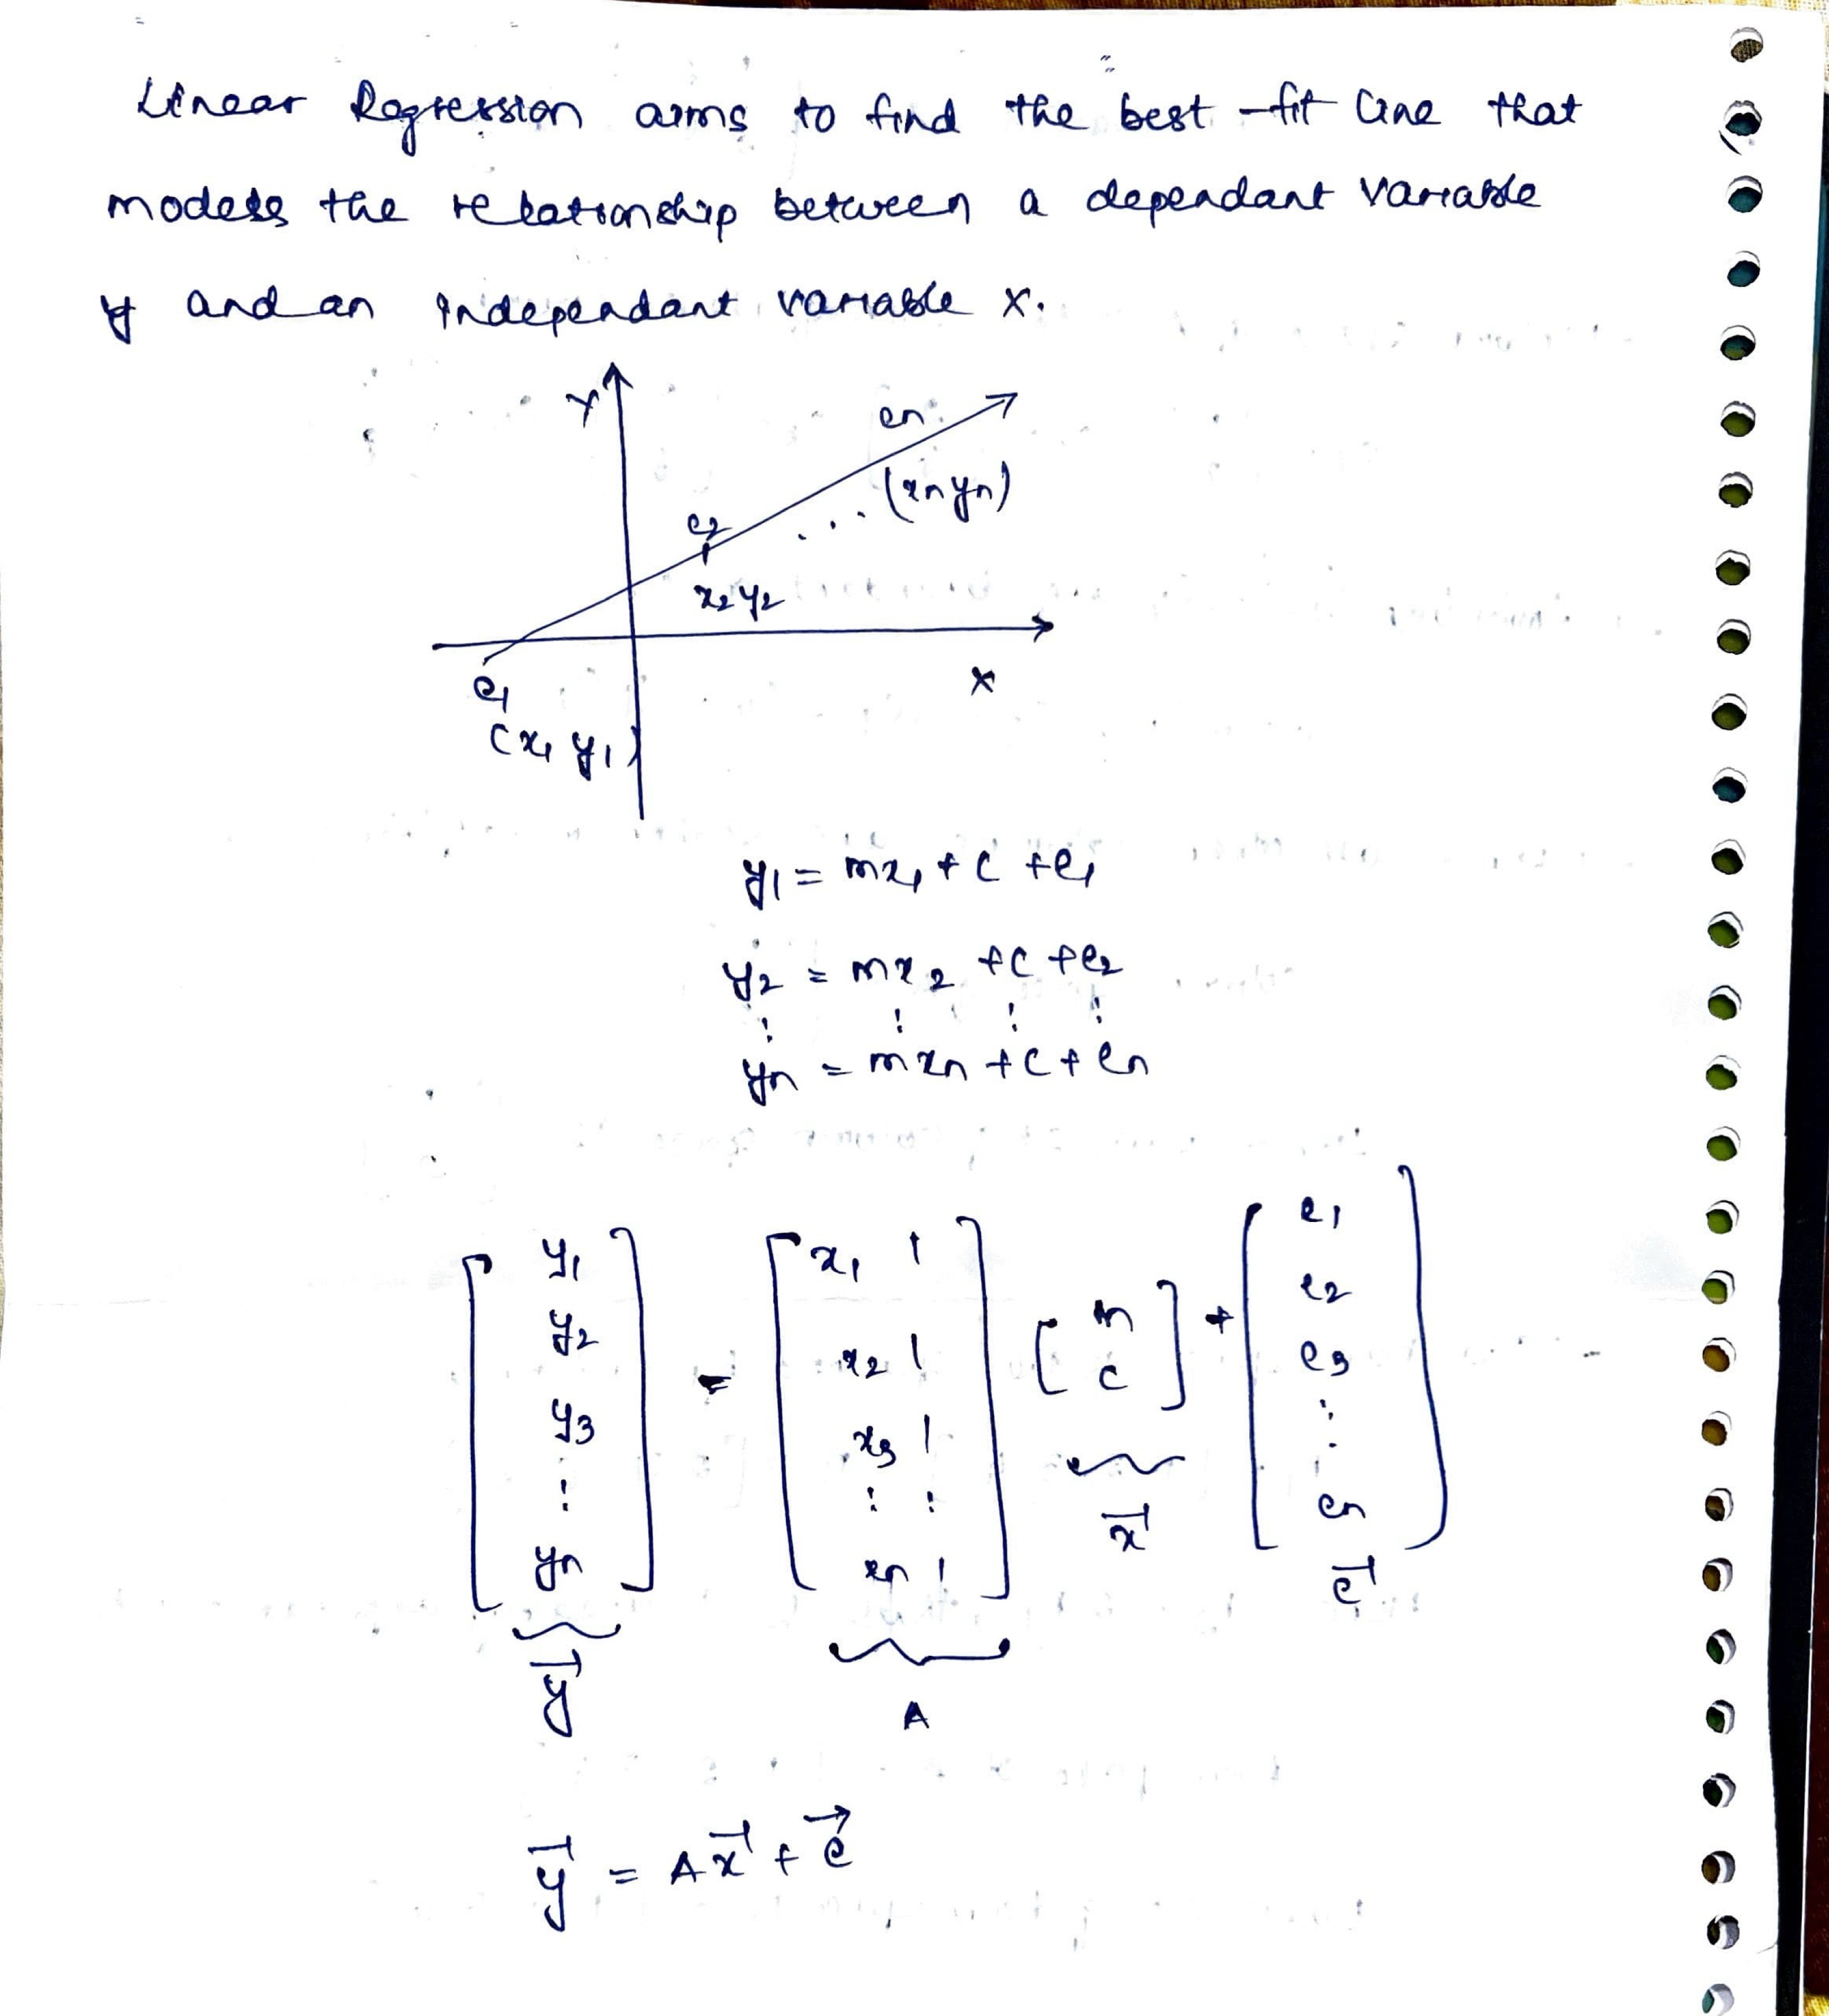

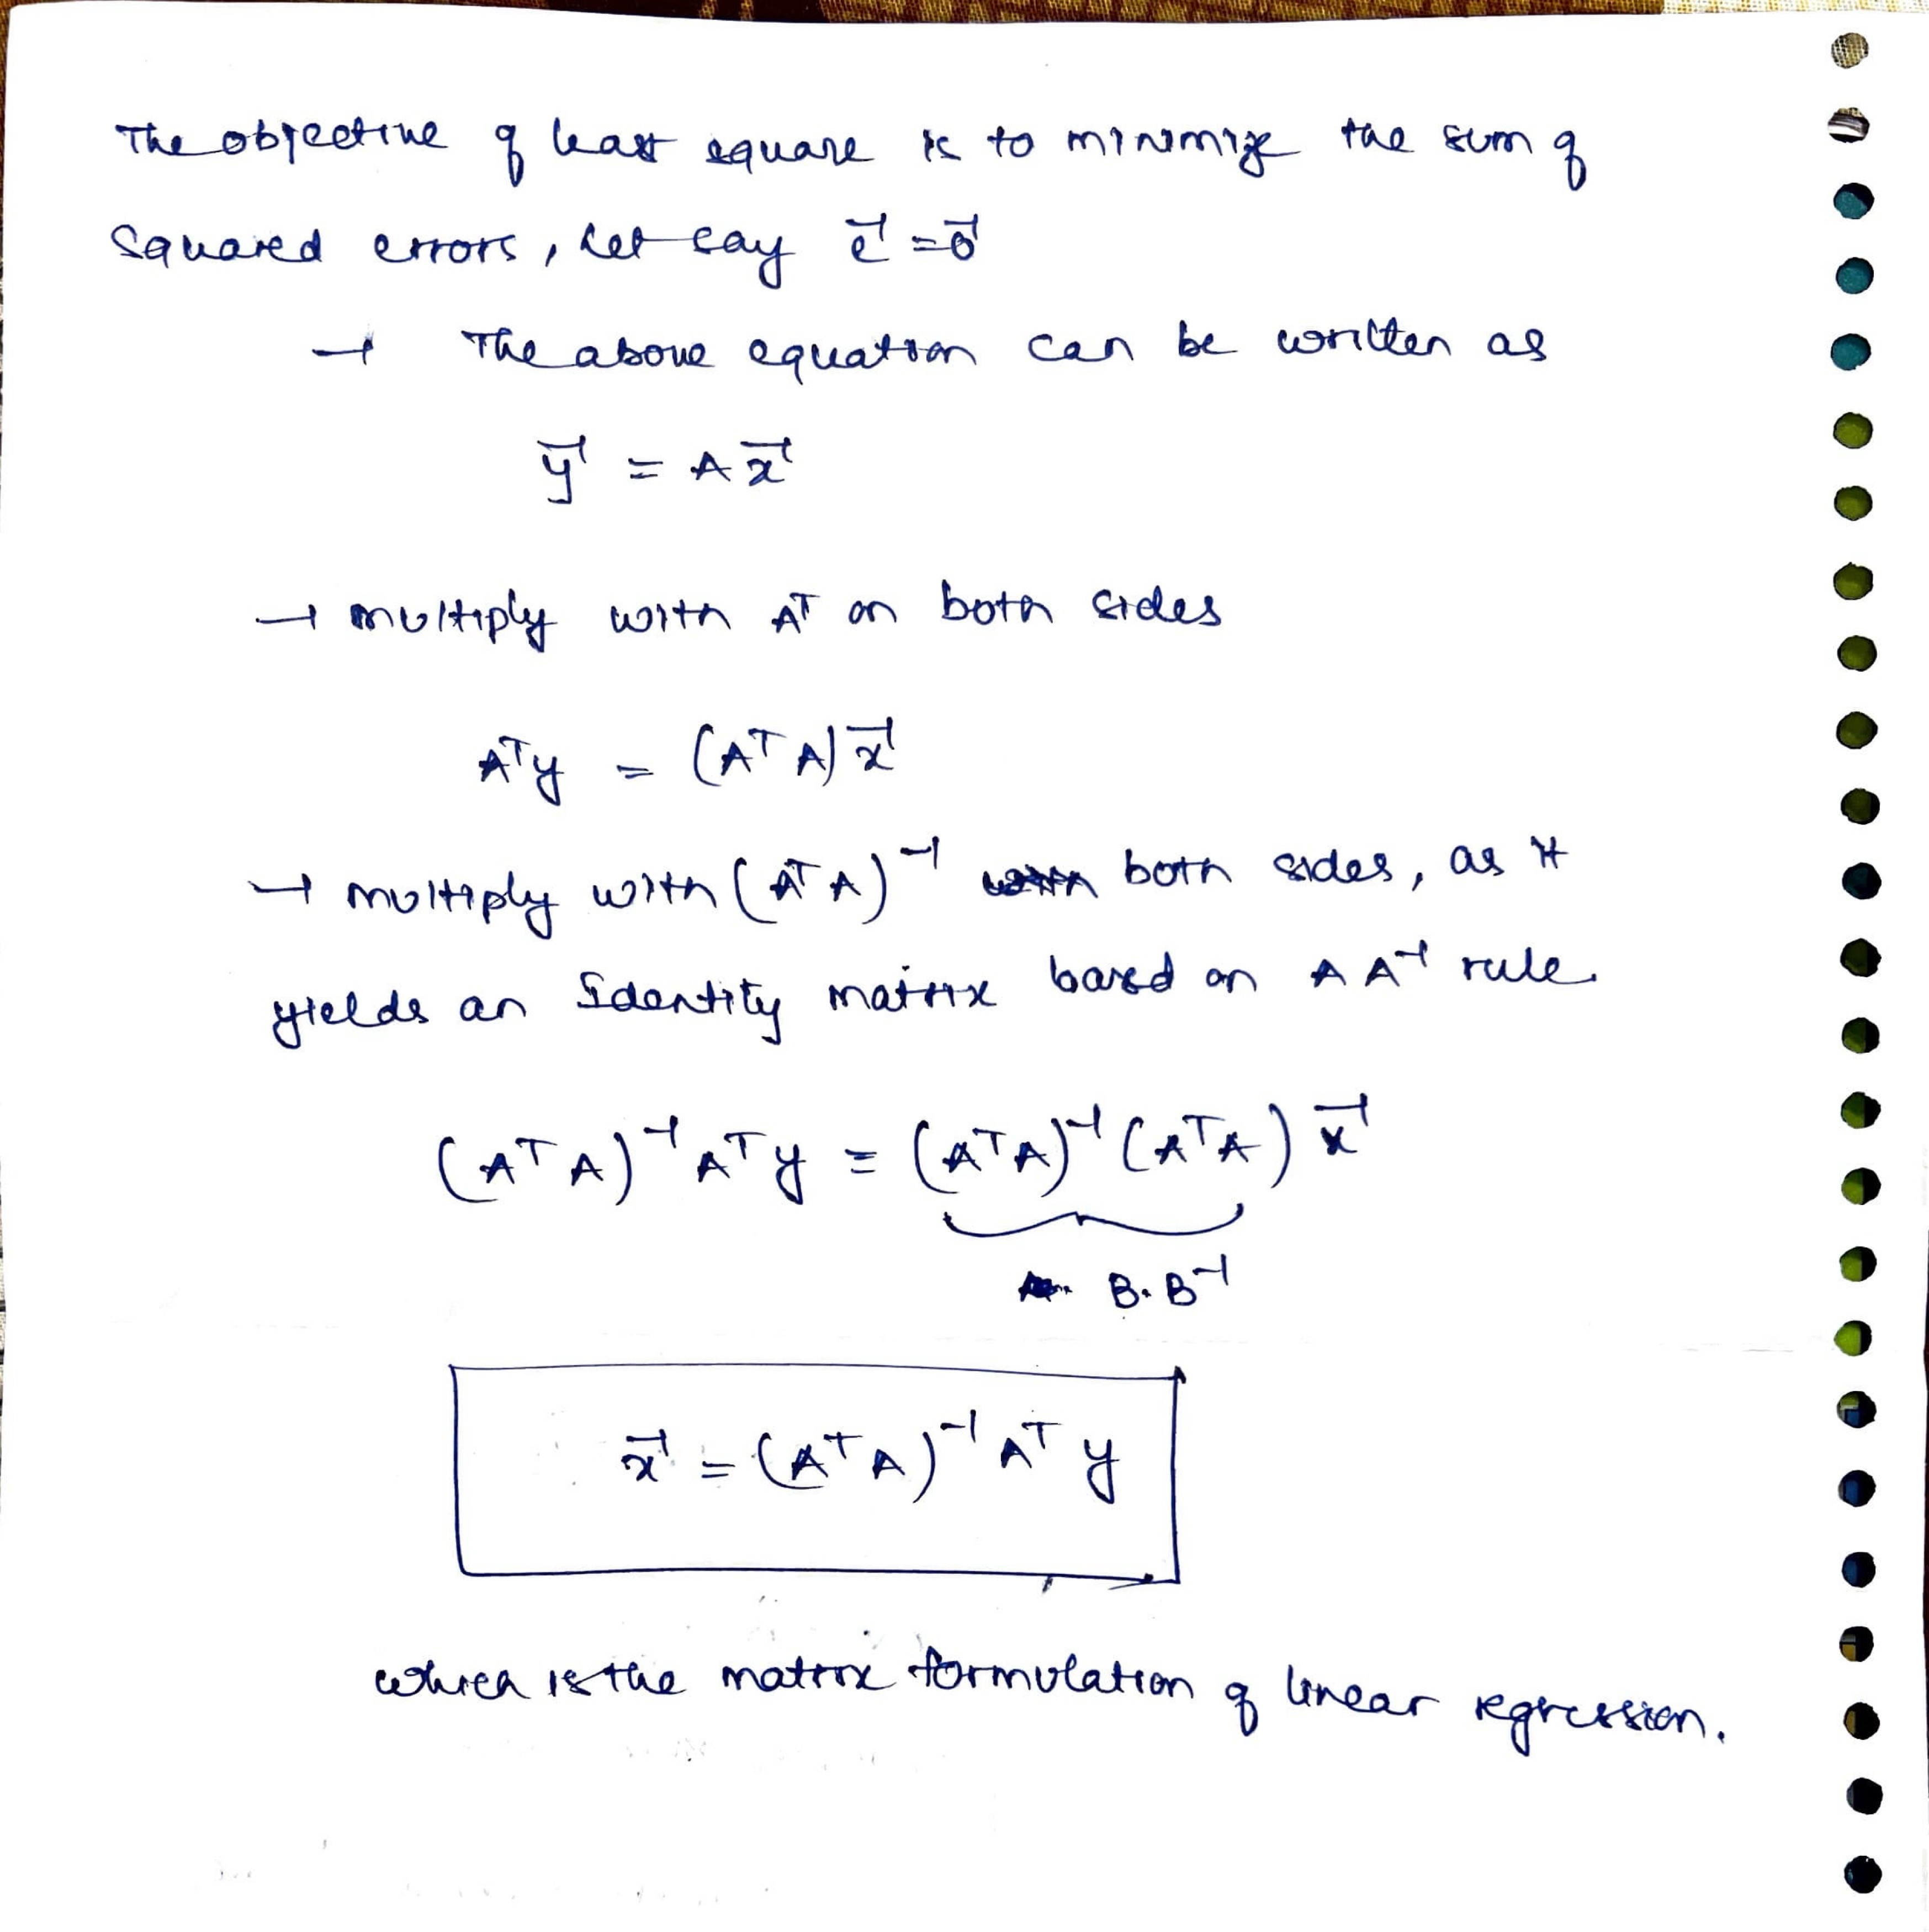



---

### 24. Does the following system of linear equations Ax = b has a solution? If it does not have a solution can you find an approximate solution using the following:

### Method of least squares (you can use python for this) and justify why the system of linear equations does not have a solution. The system of linear equations Ax = b is as follows:


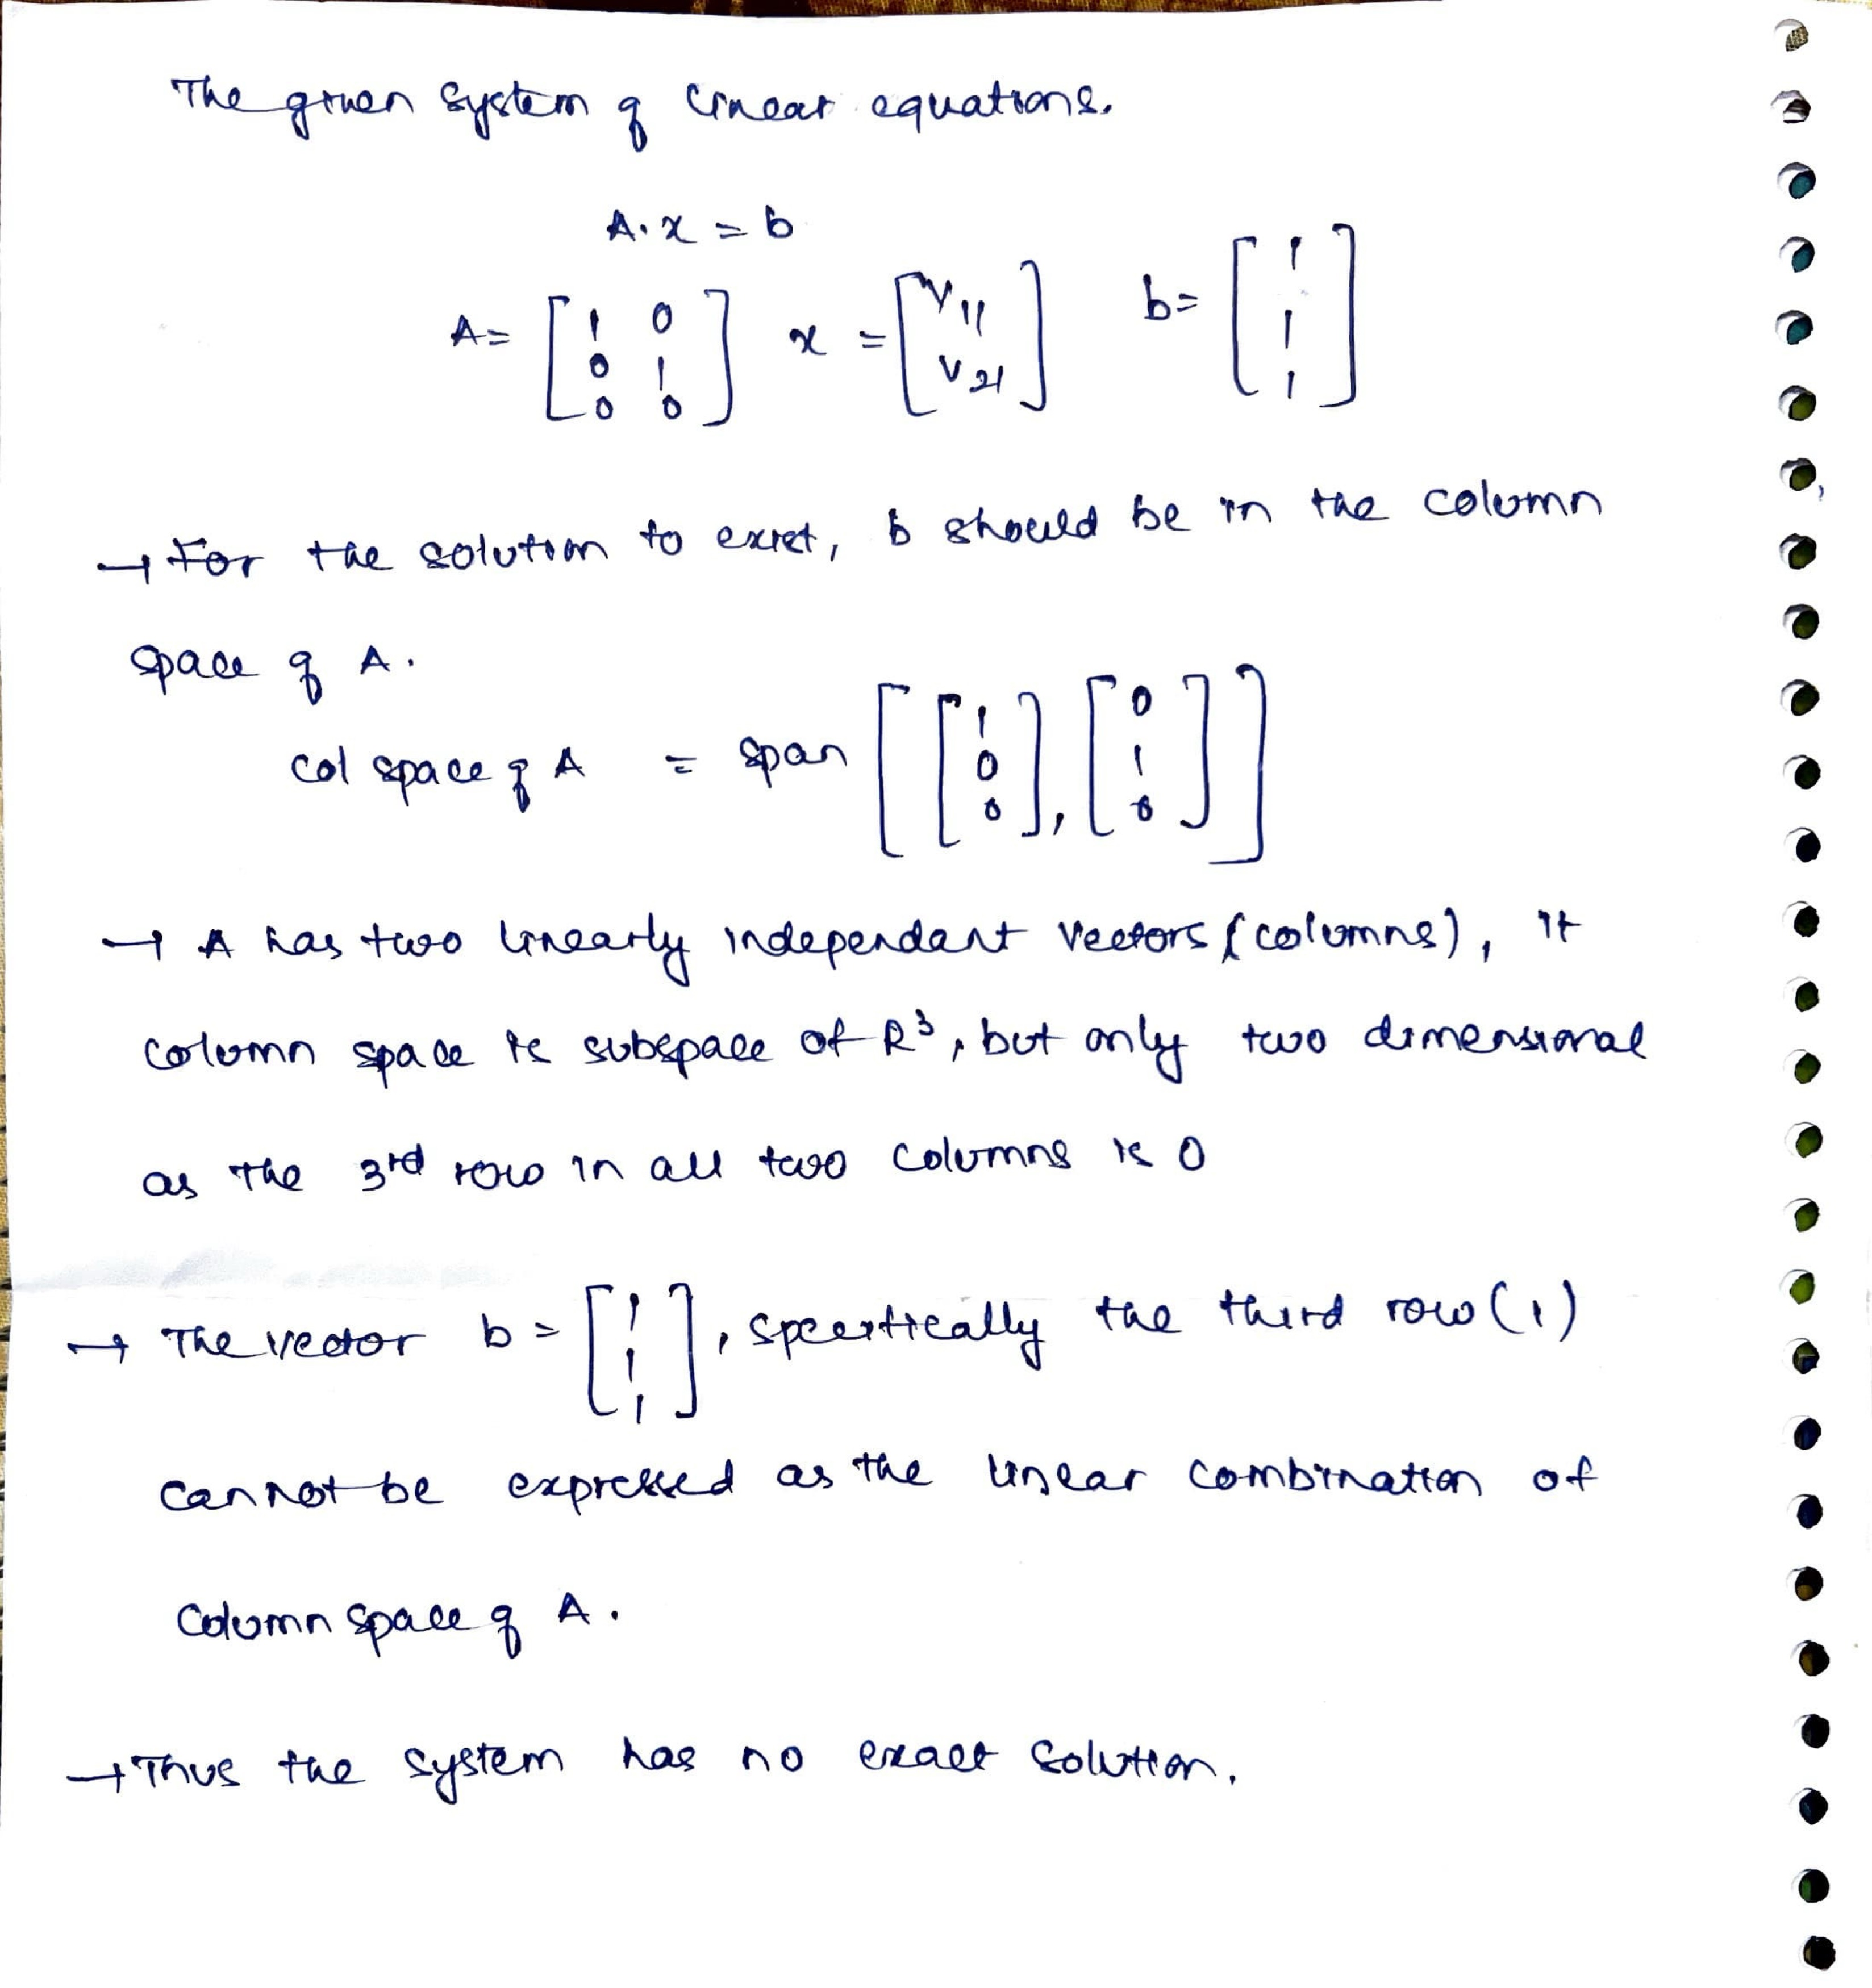

In [ ]:
import numpy as np


# Since no exact solution exists, we use the Least Squares Approximation


# x = Inverse of (A Transpose . A) . A Transpose . b



# Define A and b
A = np.array([[1, 0],
              [0, 1],
              [0, 0]])

b = np.array([[1],
              [1],
              [1]])

# Compute the least squares solution

approx_sol = np.linalg.lstsq(A, b, rcond=None)[0]

print("Least Squares Approximate Solution:\n", approx_sol)


Least Squares Approximate Solution:
 [[1.]
 [1.]]




---



### 25. For the data (data.txt) attached in the email find the following using python:

### Find a line that best fit the data with minimum error (sum of squares). [Don’t use inbuilt code in python].
### Find a second degree, third degree and fourth degree polynomial that fits the data respectively. Also find the error in each case and note down your inference. ([Don’t use inbuilt code in python]. Refer the slides for help).


Degree 1 Polynomial Error: 26.400852003969952

Degree 2 Polynomial Error: 16.379827969870632

Degree 3 Polynomial Error: 4.407896050253198

Degree 4 Polynomial Error: 3.2693346237245318




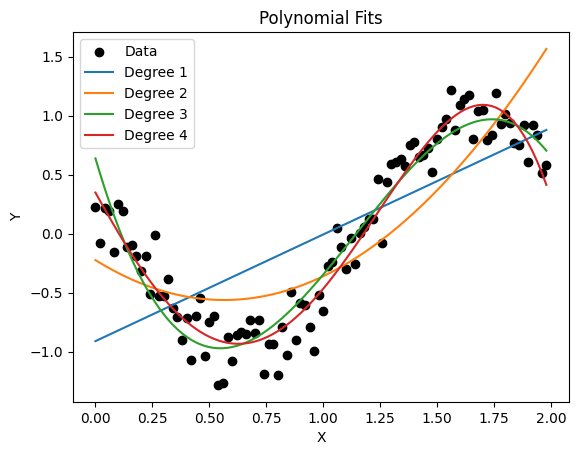

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def polynomial_fit(x, y, degree):
    # Create Vandermonde matrix
    X = np.vander(x, degree + 1, increasing=True)

    # Computing (X^T * X)^-1 * X^T
    X_inv = np.linalg.inv(X.T @ X) @ X.T

    # Compute coefficients
    coeffs = X_inv @ y
    return coeffs

def compute_error(x, y, coeffs):
    X = np.vander(x, len(coeffs), increasing=True)
    y_pred = X @ coeffs
    error = np.sum((y - y_pred) ** 2)
    return error

def plot_fits(x, y, coeffs_list, degrees):
    plt.scatter(x, y, color='black', label='Data')
    x_fit = np.linspace(min(x), max(x), 100)

    for coeffs, degree in zip(coeffs_list, degrees):
        y_fit = np.vander(x_fit, len(coeffs), increasing=True) @ coeffs
        plt.plot(x_fit, y_fit, label=f'Degree {degree}')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polynomial Fits')
    plt.show()


data = np.loadtxt('/data.txt')
x, y = data[:, 0], data[:, 1]
degrees = [1, 2, 3, 4]

coeffs_list = [polynomial_fit(x, y, d) for d in degrees]

errors = [compute_error(x, y, coeffs) for coeffs in coeffs_list]

for d, e in zip(degrees, errors):
    print(f'\nDegree {d} Polynomial Error: {e}')

print('\n')

plot_fits(x, y, coeffs_list, degrees)



